# Importation des packages et importer les données

In [1]:
#Import packages

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.decomposition as PCA
import sklearn.preprocessing as StandardScaler
import scipy.stats as stats

## Importation des données

In [2]:
# Importation du dataframe
df=pd.read_excel("National_Nutrient_DataBase.xlsx")
#Afficher les premières lignes du tableau
df.head()

NDB_No               Shrt_Desc  Water_(g)  Energ_Kcal  Protein_(g)  \
0    1001        BUTTER,WITH SALT      15.87         717         0.85   
1    1002  BUTTER,WHIPPED,W/ SALT      16.72         718         0.49   
2    1003    BUTTER OIL,ANHYDROUS       0.24         876         0.28   
3    1004             CHEESE,BLUE      42.41         353        21.40   
4    1005            CHEESE,BRICK      41.11         371        23.24   

   Lipid_Tot_(g)  Ash_(g)  Carbohydrt_(g)  Fiber_TD_(g)  Sugar_Tot_(g)  ...  \
0          81.11     2.11            0.06           0.0           0.06  ...   
1          78.30     1.62            2.87           0.0           0.06  ...   
2          99.48     0.00            0.00           0.0           0.00  ...   
3          28.74     5.11            2.34           0.0           0.50  ...   
4          29.68     3.18            2.79           0.0           0.51  ...   

   Vit_K_(µg)  FA_Sat_(g)  FA_Mono_(g)  FA_Poly_(g)  Cholestrl_(mg)  GmWt_1  \
0         7.0      51.368       21.021        3.043           215.0    5.00   
1         4.6      45.390       19.874        3.331           225.0    3.80   
2         8.6      61.924       28.732        3.694           256.0   12.80   
3         2.4      18.669        7.778        0.800            75.0   28.35   
4         2.5      18.764        8.598        0.784            94.0  132.00   

                   GmWt_Desc1  GmWt_2       GmWt_Desc2  Refuse_Pct  
0  1 pat,  (1" sq, 1/3" high)    14.2           1 tbsp         0.0  
1  1 pat,  (1" sq, 1/3" high)     9.4           1 tbsp         0.0  
2                      1 tbsp   205.0            1 cup         0.0  
3                        1 oz    17.0     1 cubic inch         0.0  
4                1 cup, diced   113.0  1 cup, shredded         0.0  

[5 rows x 53 columns]

In [3]:
#Changement d'index
df=df.set_index('NDB_No')

In [4]:
#Analyse de la dimension de la base de données
df.shape

(8790, 52)

In [5]:
# Analyse de l'ensemble des variables de la base de données
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 1001 to 93600
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Shrt_Desc          8790 non-null   object 
 1   Water_(g)          8789 non-null   float64
 2   Energ_Kcal         8790 non-null   int64  
 3   Protein_(g)        8790 non-null   float64
 4   Lipid_Tot_(g)      8790 non-null   float64
 5   Ash_(g)            8465 non-null   float64
 6   Carbohydrt_(g)     8790 non-null   float64
 7   Fiber_TD_(g)       8196 non-null   float64
 8   Sugar_Tot_(g)      6958 non-null   float64
 9   Calcium_(mg)       8442 non-null   float64
 10  Iron_(mg)          8646 non-null   float64
 11  Magnesium_(mg)     8051 non-null   float64
 12  Phosphorus_(mg)    8211 non-null   float64
 13  Potassium_(mg)     8364 non-null   float64
 14  Sodium_(mg)        8707 non-null   float64
 15  Zinc_(mg)          8084 non-null   float64
 16  Copper_mg)         7

| Nom de la variable | Définition |
| ------------------ | -------------------------------------------------------------------------------------------------------------- |
| NDB_No | Un identifiant numérique unique pour chaque aliment dans la base de données. |
| Shrt_Desc | Le nom abrégé de l'aliment. |
| Water_(g) | La quantité d'eau (en grammes) dans l'aliment. |
| Energ_Kcal | La quantité d'énergie (en calories) fournie par l'aliment. |
| Protein_(g) | La quantité de protéines (en grammes) dans l'aliment. |
| Lipid_Tot_(g) | La quantité de lipides (en grammes) dans l'aliment. |
| Ash_(g) | La quantité de matières minérales (en grammes) dans l'aliment. |
| Carbohydrt_(g) | La quantité de glucides (en grammes) dans l'aliment. |
| Fiber_TD_(g) | La quantité de fibres alimentaires totales (en grammes) dans l'aliment. |
| Sugar_Tot_(g) | La quantité de sucres (en grammes) dans l'aliment. |
| Calcium_(mg) | La quantité de calcium (en milligrammes) dans l'aliment. |
| Iron_(mg) | La quantité de fer (en milligrammes) dans l'aliment. |
| Magnesium_(mg) | La quantité de magnésium (en milligrammes) dans l'aliment. |
| Phosphorus_(mg) | La quantité de phosphore (en milligrammes) dans l'aliment. |
| Potassium_(mg) | La quantité de potassium (en milligrammes) dans l'aliment. |
| Sodium_(mg) | La quantité de sodium (en milligrammes) dans l'aliment. |
| Zinc_(mg) | La quantité de zinc (en milligrammes) dans l'aliment. |
| Copper_mg) | La quantité de cuivre (en milligrammes) dans l'aliment. |
| Manganese_(mg) | La quantité de manganèse (en milligrammes) dans l'aliment. |
| Selenium_(µg) | La quantité de sélénium (en microgrammes) dans l'aliment. |
| Vit_C_(mg) | La quantité de vitamine C (en milligrammes) dans l'aliment. |
| Thiamin_(mg) | La quantité de thiamine (en milligrammes) dans l'aliment. |
| Riboflavin_(mg) | La quantité de riboflavine (en milligrammes) dans l'aliment. |
| Niacin_(mg) | La quantité de niacine (en milligrammes) dans l'aliment. |
| Panto_Acid_mg) | La quantité d'acide pantothénique (en milligrammes) dans l'aliment. |
| Vit_B6_(mg) | La quantité de vitamine B6 (en milligrammes) dans l'aliment. |
| Folate_Tot_(µg) | La quantité de folates totaux (en microgrammes) dans l'aliment. |
| Folic_Acid_(µg) | La quantité d'acide folique (en microgrammes) dans l'aliment. |
| ------------------ | -------------------------------------------------------------------------------------------------------------- |
| Folate_DFE_(µg) | La quantité d'équivalent folate diététique (en microgrammes) dans l'aliment. |
| Choline_Tot_ (mg) | La quantité de choline (en milligrammes) dans l'aliment. |
| Vit_B12_(µg) | La quantité de vitamine B12 (en microgrammes) dans l'aliment. |
| Vit_A_IU | La quantité de vitamine A (en unités internationales) dans l'aliment. |
| Vit_A_RAE | La quantité d'équivalent rétinol d'activité de la vitamine A (en microgrammes) dans l'aliment. |
| Retinol_(µg) | La quantité de rétinol (en microgrammes) dans l'aliment. |
| Alpha_Carot_(µg) | La quantité d'alpha-carotène (en microgrammes) dans l'aliment. |
| Beta_Carot_(µg) | La quantité de bêta-carotène (en microgrammes) dans l'aliment. |
| Beta_Crypt_(µg) | La quantité de bêta-cryptoxanthine (en microgrammes) dans l'aliment. |
| Lycopene_(µg) | La quantité de lycopène (en microgrammes) dans l'aliment. |
| Lut+Zea_ (µg) | La quantité de lutéine et zéaxanthine (en microgrammes) dans l'aliment. |
| Vit_E_(mg) | La quantité de vitamine E (en milligrammes) dans l'aliment. |
| Vit_D_µg | La quantité de vitamine D (en microgrammes) dans l'aliment. |
| Vit_D_IU | La quantité de vitamine D (en unités internationales) dans l'aliment. |
| Vit_K_(µg) | La quantité de vitamine K (en microgrammes) dans l'aliment. |
| FA_Sat_(g) | La quantité d'acides gras saturés (en grammes) dans l'aliment. |
| FA_Mono_(g) | La quantité d'acides gras monoinsaturés (en grammes) dans l'aliment. |
| FA_Poly_(g) | La quantité d'acides gras polyinsaturés (en grammes) dans l'aliment. |
| Cholestrl_(mg) | La quantité de cholestérol (en milligrammes) dans l'aliment. |
| GmWt_1 | Le poids (en grammes) d'une portion typique de l'aliment. |
| GmWt_Desc1 | La description de la portion typique de l'aliment. |
| GmWt_2 | Le poids (en grammes) d'une deuxième portion typique de l'aliment. |
| GmWt_Desc2 | La description de la deuxième portion typique de l'aliment. |
| Refuse_Pct | Le pourcentage de déchets (par exemple, les os, la peau, les graines) pour l'aliment. |


In [6]:
# Analyse du type de variable dans la base de données
df.dtypes

Shrt_Desc             object
Water_(g)            float64
Energ_Kcal             int64
Protein_(g)          float64
Lipid_Tot_(g)        float64
Ash_(g)              float64
Carbohydrt_(g)       float64
Fiber_TD_(g)         float64
Sugar_Tot_(g)        float64
Calcium_(mg)         float64
Iron_(mg)            float64
Magnesium_(mg)       float64
Phosphorus_(mg)      float64
Potassium_(mg)       float64
Sodium_(mg)          float64
Zinc_(mg)            float64
Copper_mg)           float64
Manganese_(mg)       float64
Selenium_(µg)        float64
Vit_C_(mg)           float64
Thiamin_(mg)         float64
Riboflavin_(mg)      float64
Niacin_(mg)          float64
Panto_Acid_mg)       float64
Vit_B6_(mg)          float64
Folate_Tot_(µg)      float64
Folic_Acid_(µg)      float64
Food_Folate_(µg)     float64
Folate_DFE_(µg)      float64
Choline_Tot_ (mg)    float64
Vit_B12_(µg)         float64
Vit_A_IU             float64
Vit_A_RAE            float64
Retinol_(µg)         float64
Alpha_Carot_(µ

In [43]:
# Vérifier les doublons dans toutes les colonnes
duplicates = df[df.duplicated()]

# Afficher les doublons
print("Doublons trouvés :")
print(duplicates)

Doublons trouvés :
Empty DataFrame
Columns: [Shrt_Desc, Energ_Kcal, Protein_(g), Lipid_Tot_(g), Carbohydrt_(g), Fiber_TD_(g), Calcium_(mg), Iron_(mg), Sodium_(mg), Water_(g), Magnesium_(mg), Phosphorus_(mg), Vit_C_(mg), FA_Sat_(g), FA_Mono_(g), FA_Poly_(g)]
Index: []


## Analyse des données manquantes

<AxesSubplot:>

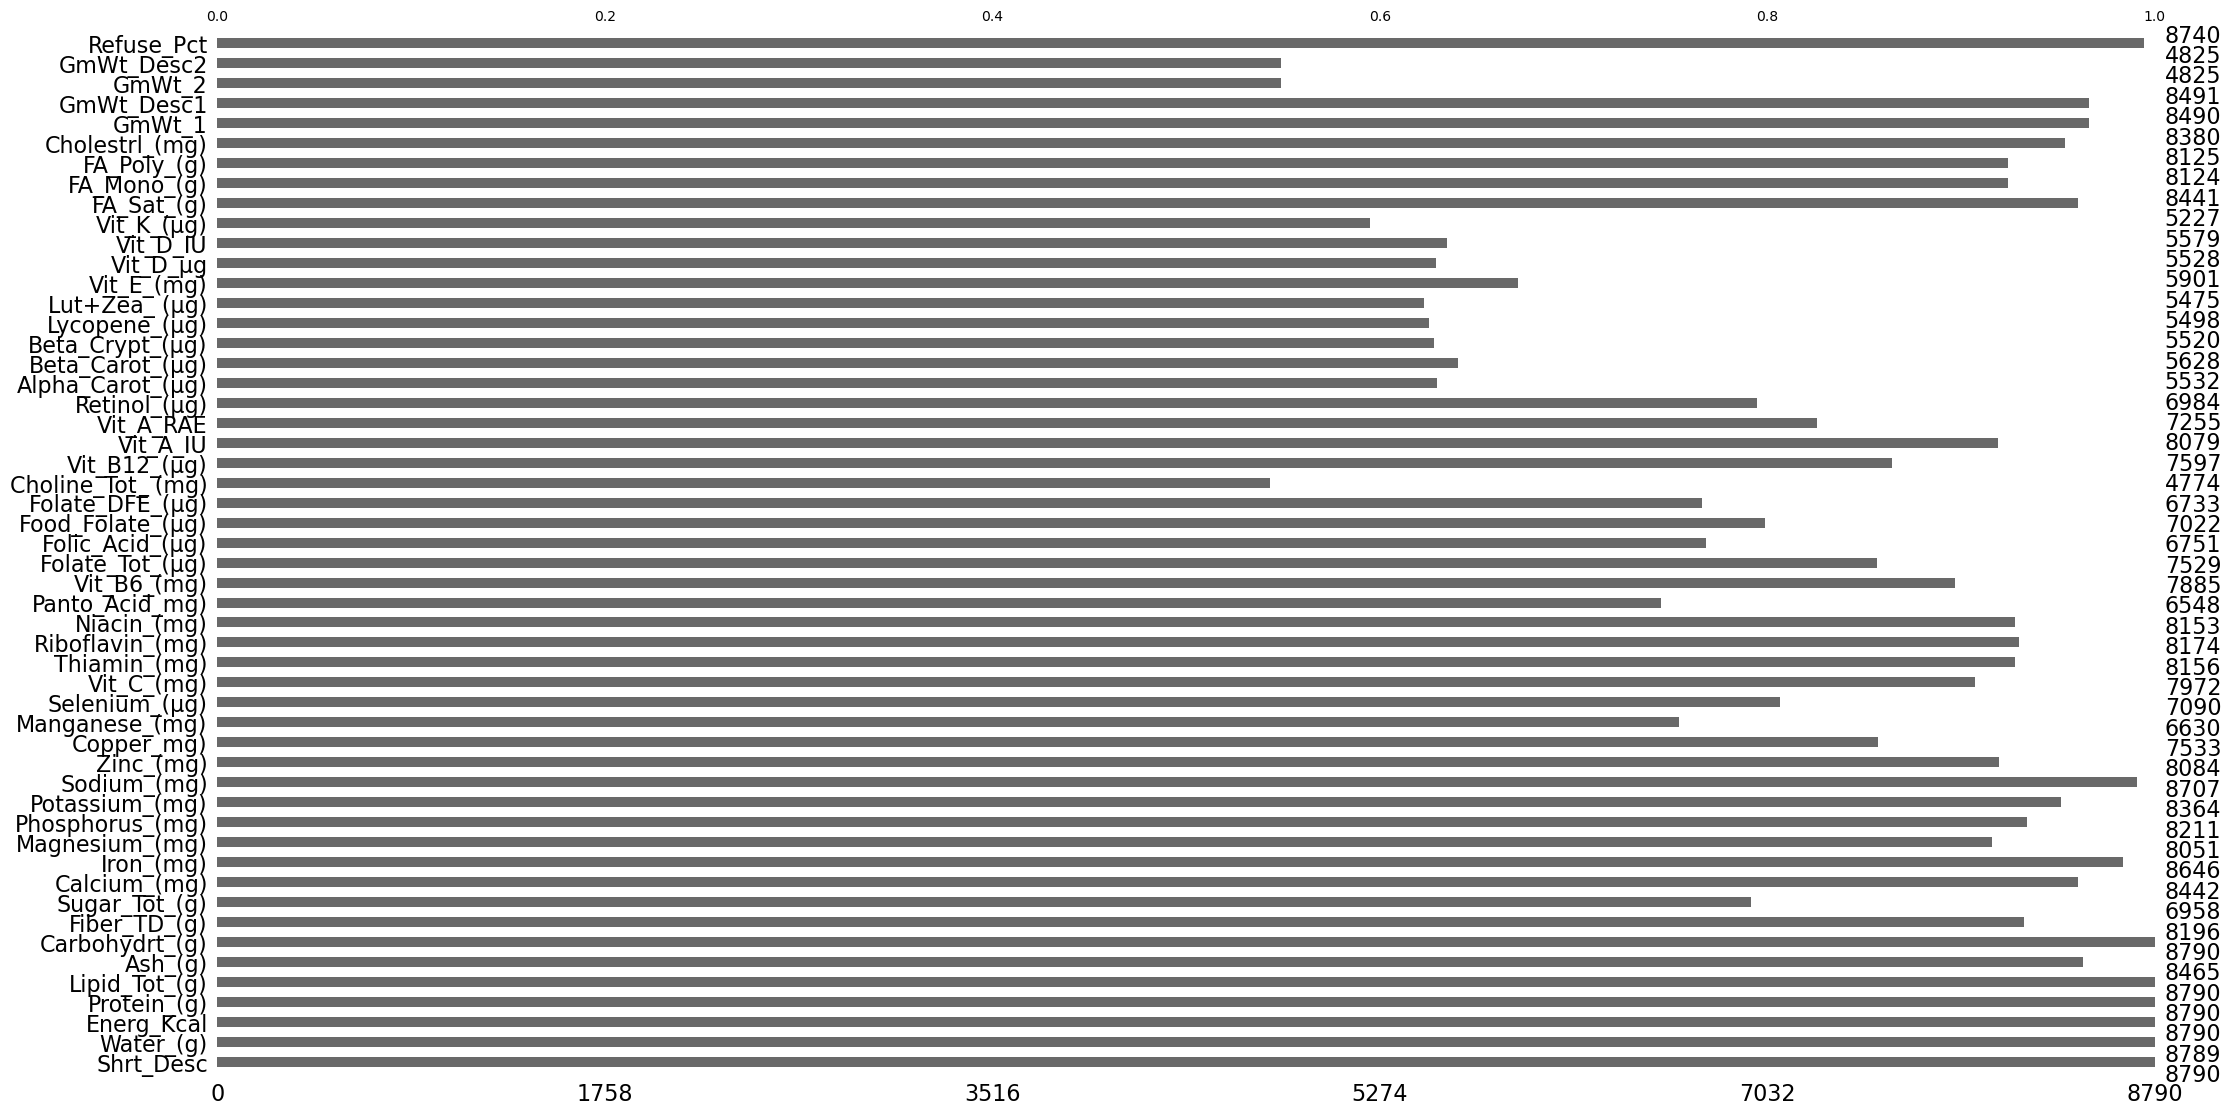

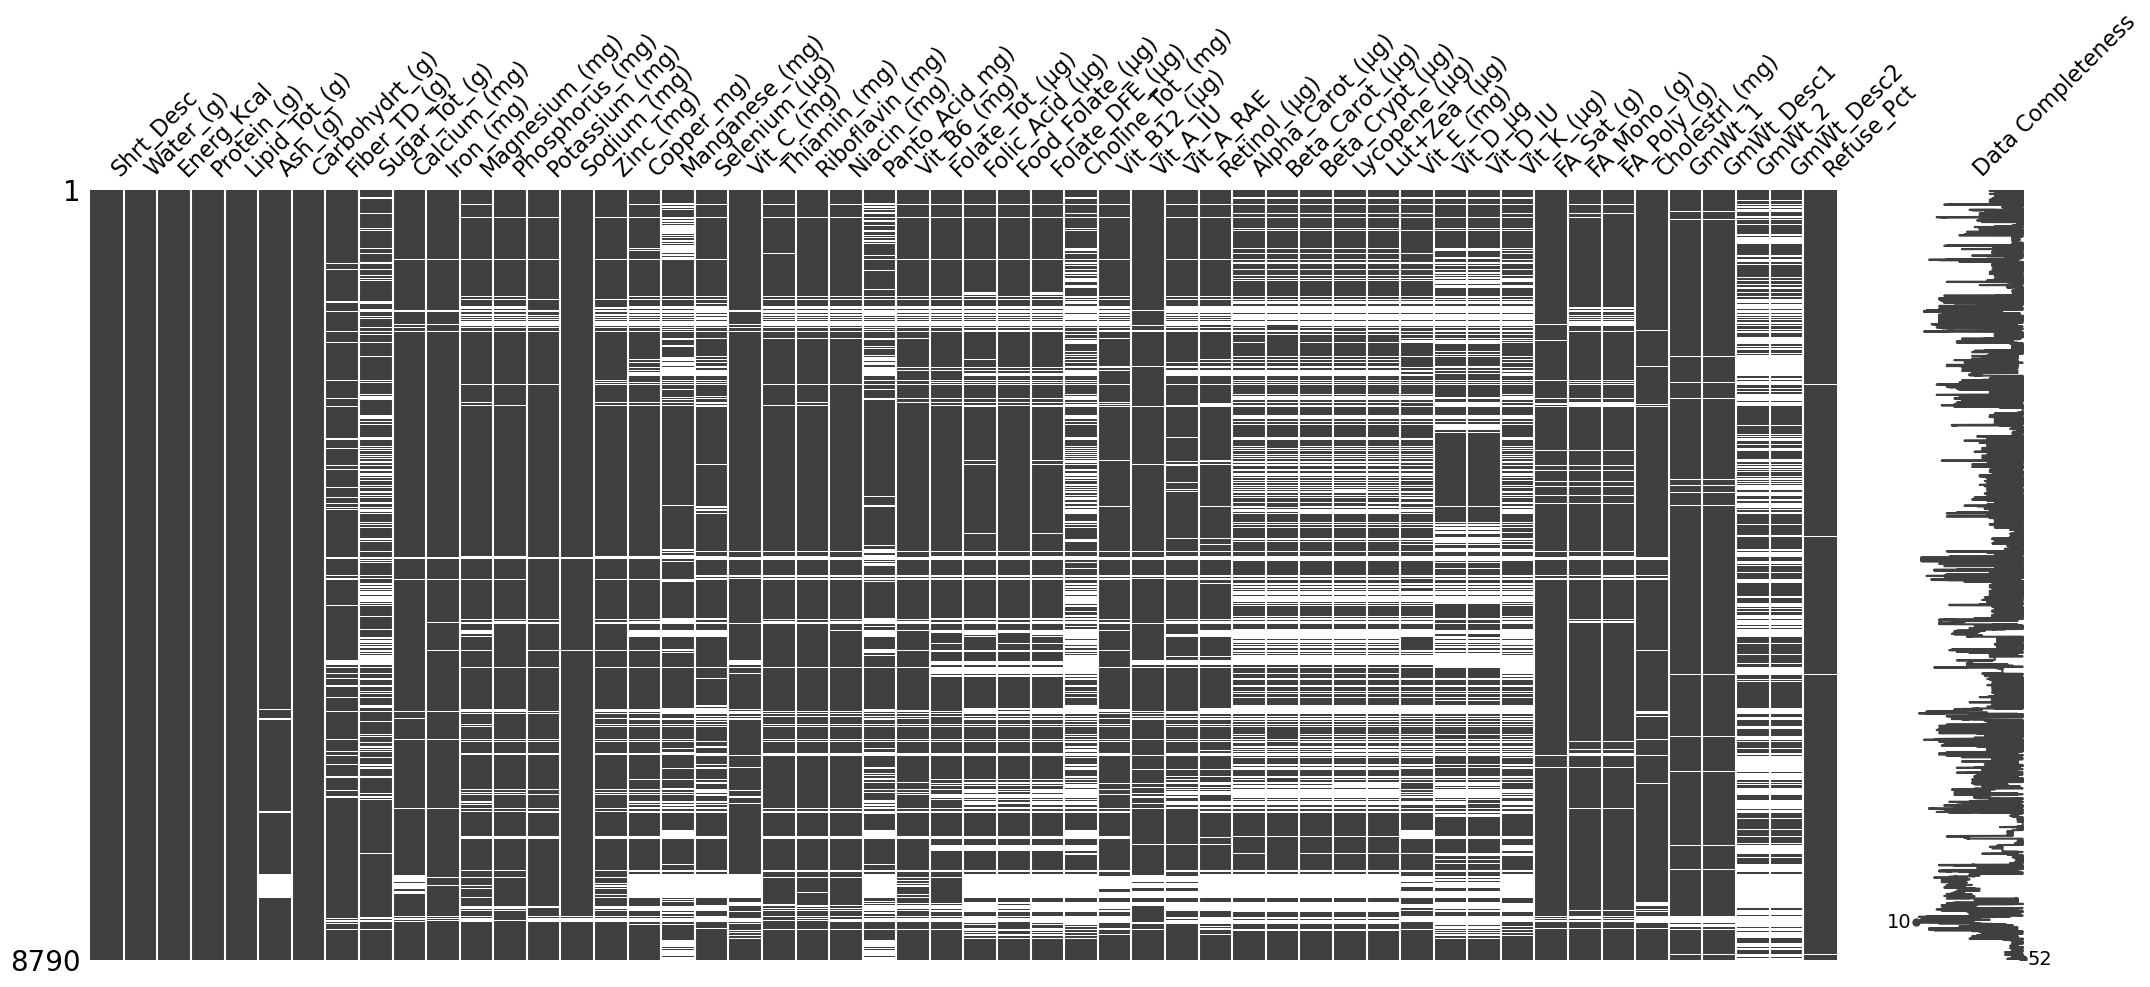

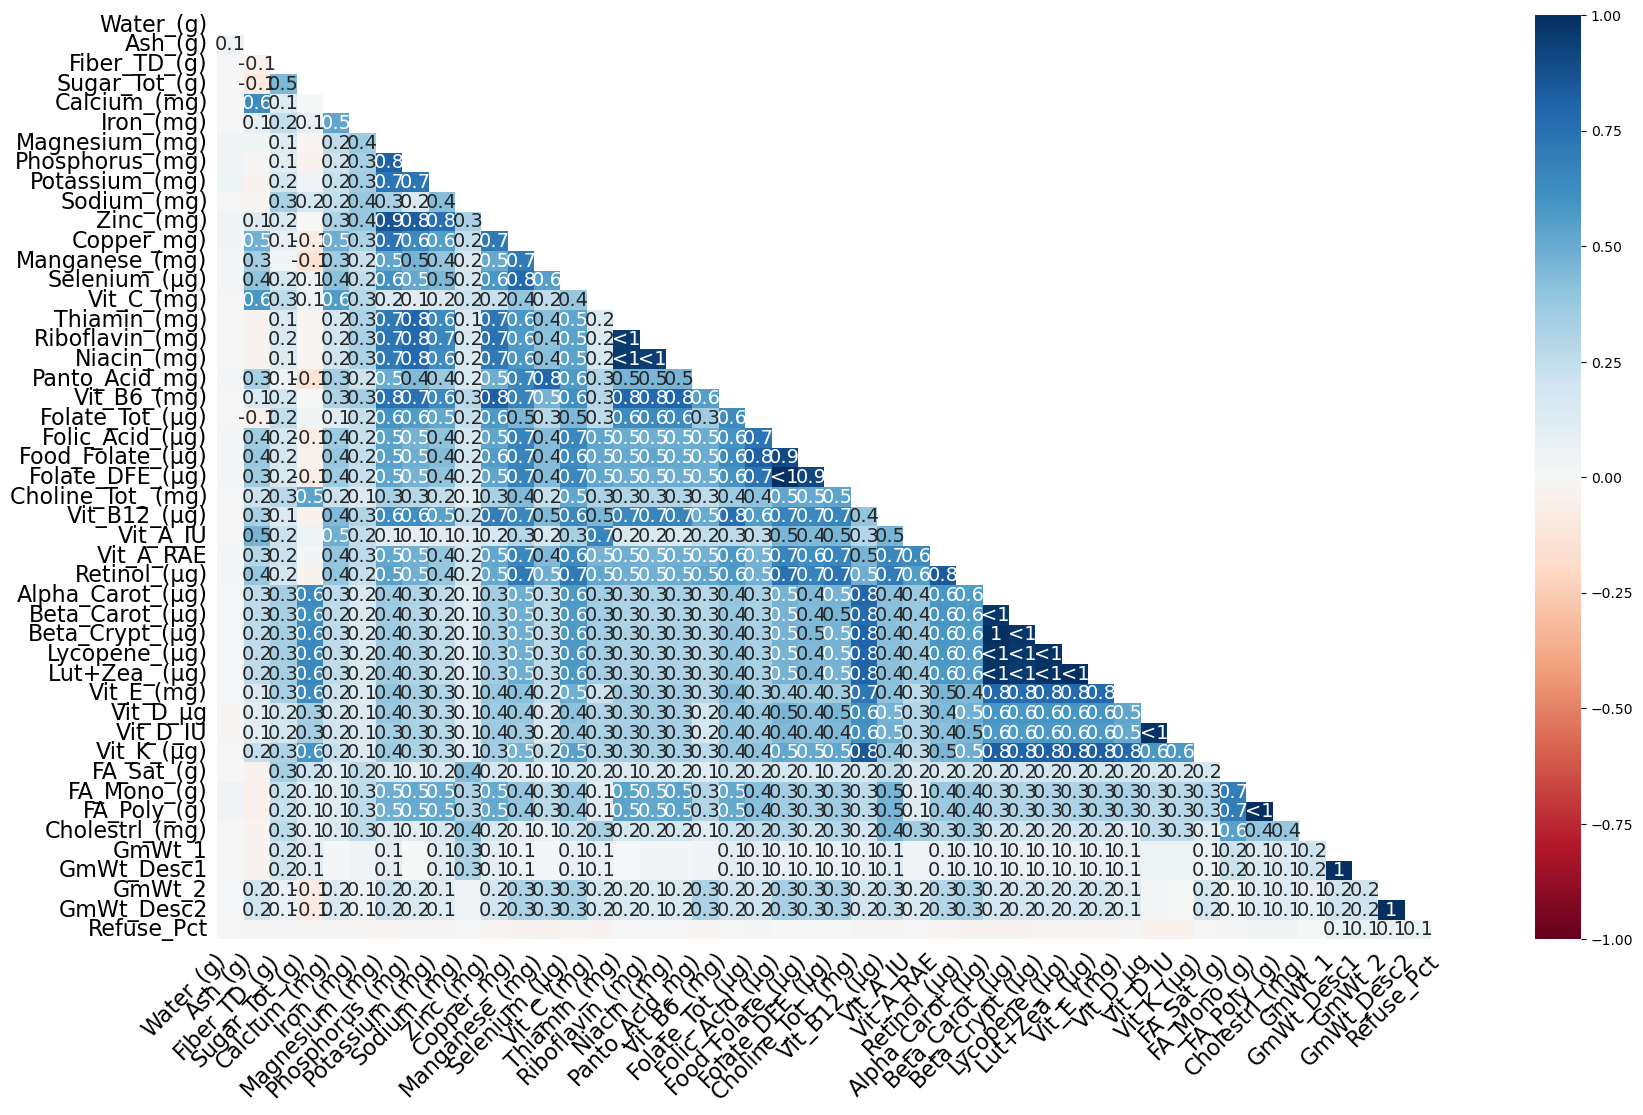

In [8]:
#!pip install missingno
import missingno as msno
# Affichage des valeurs manquantes sous forme de matrice
msno.bar(df)
msno.matrix(df,labels=True)
msno.heatmap(df)

In [9]:

# Calcul du nombre de valeurs manquantes pour chaque variable
missing_values = df.isnull().sum()

# Calcul de la proportion de valeurs manquantes pour chaque variable
missing_proportions = missing_values / len(df)

# Création d'un dataframe avec les nombres et proportions de valeurs manquantes
missing_df = pd.concat([missing_values, missing_proportions], axis=1)
missing_df.columns = ['Nombre de valeurs manquantes', 'Proportion de valeurs manquantes']

# Tri des variables par ordre décroissant de proportion de valeurs manquantes
missing_df = missing_df.sort_values('Proportion de valeurs manquantes', ascending=False)

# Affichage du tableau
missing_df

Nombre de valeurs manquantes  \
Choline_Tot_ (mg)                          4016   
GmWt_Desc2                                 3965   
GmWt_2                                     3965   
Vit_K_(µg)                                 3563   
Lut+Zea_ (µg)                              3315   
Lycopene_(µg)                              3292   
Beta_Crypt_(µg)                            3270   
Vit_D_µg                                   3262   
Alpha_Carot_(µg)                           3258   
Vit_D_IU                                   3211   
Beta_Carot_(µg)                            3162   
Vit_E_(mg)                                 2889   
Panto_Acid_mg)                             2242   
Manganese_(mg)                             2160   
Folate_DFE_(µg)                            2057   
Folic_Acid_(µg)                            2039   
Sugar_Tot_(g)                              1832   
Retinol_(µg)                               1806   
Food_Folate_(µg)                           1768   
Selenium_(µg)                              1700   
Vit_A_RAE                                  1535   
Folate_Tot_(µg)                            1261   
Copper_mg)                                 1257   
Vit_B12_(µg)                               1193   
Vit_B6_(mg)                                 905   
Vit_C_(mg)                                  818   
Magnesium_(mg)                              739   
Vit_A_IU                                    711   
Zinc_(mg)                                   706   
FA_Mono_(g)                                 666   
FA_Poly_(g)                                 665   
Niacin_(mg)                                 637   
Thiamin_(mg)                                634   
Riboflavin_(mg)                             616   
Fiber_TD_(g)                                594   
Phosphorus_(mg)                             579   
Potassium_(mg)                              426   
Cholestrl_(mg)                              410   
FA_Sat_(g)                                  349   
Calcium_(mg)                                348   
Ash_(g)                                     325   
GmWt_1                                      300   
GmWt_Desc1                                  299   
Iron_(mg)                                   144   
Sodium_(mg)                                  83   
Refuse_Pct                                   50   
Water_(g)                                     1   
Carbohydrt_(g)                                0   
Lipid_Tot_(g)                                 0   
Protein_(g)                                   0   
Energ_Kcal                                    0   
Shrt_Desc                                     0   

                   Proportion de valeurs manquantes  
Choline_Tot_ (mg)                          0.456883  
GmWt_Desc2                                 0.451081  
GmWt_2                                     0.451081  
Vit_K_(µg)                                 0.405347  
Lut+Zea_ (µg)                              0.377133  
Lycopene_(µg)                              0.374516  
Beta_Crypt_(µg)                            0.372014  
Vit_D_µg                                   0.371104  
Alpha_Carot_(µg)                           0.370648  
Vit_D_IU                                   0.365301  
Beta_Carot_(µg)                            0.359727  
Vit_E_(mg)                                 0.328669  
Panto_Acid_mg)                             0.255063  
Manganese_(mg)                             0.245734  
Folate_DFE_(µg)                            0.234016  
Folic_Acid_(µg)                            0.231968  
Sugar_Tot_(g)                              0.208419  
Retinol_(µg)                               0.205461  
Food_Folate_(µg)                           0.201138  
Selenium_(µg)                              0.193402  
Vit_A_RAE                                  0.174630  
Folate_Tot_(µg)                            0.143458  
Copper_mg)                                 0.143003  
Vit_B12_(µg)       

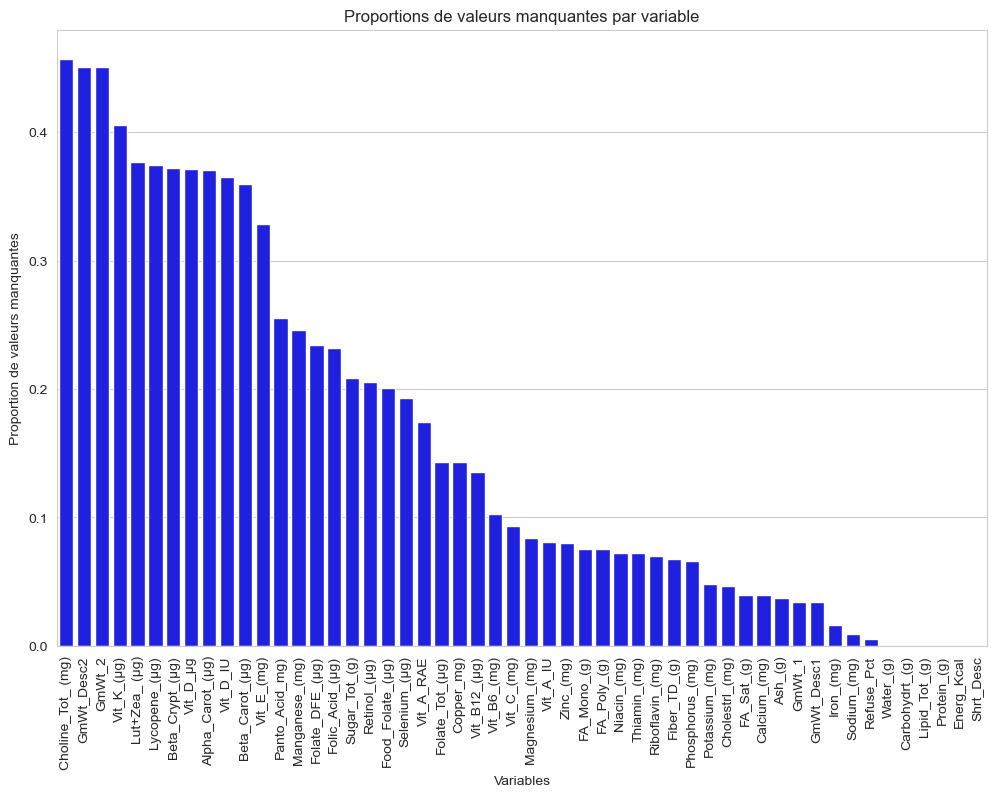

In [10]:

# Calcul de la proportion de valeurs manquantes pour chaque variable
missing_proportions = df.isnull().mean().sort_values(ascending=False)

# Création du graphique avec Seaborn
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=missing_proportions.index, y=missing_proportions.values, ax=ax, color='blue')
ax.set_xlabel('Variables')
ax.set_ylabel('Proportion de valeurs manquantes')
ax.set_xticklabels(missing_proportions.index, rotation=90)
ax.set_title('Proportions de valeurs manquantes par variable')
plt.show()

In [11]:
vars_list =['Energ_Kcal','Protein_(g)','Lipid_Tot_(g)','Carbohydrt_(g)','Fiber_TD_(g)','Calcium_(mg)','Iron_(mg)','Sodium_(mg)','Water_(g)','Magnesium_(mg)','Phosphorus_(mg)','Vit_C_(mg)','FA_Sat_(g)','FA_Mono_(g)','FA_Poly_(g)']


# Calcul de la proportion de valeurs manquantes pour chaque variable dans la liste
missing_prop = df[vars_list].isna().mean().reset_index()

# Renommage des colonnes
missing_prop.columns = ['variable', 'missing_prop']

# Tri par ordre décroissant de la proportion de valeurs manquantes
missing_prop = missing_prop.sort_values('missing_prop', ascending=False)

# Affichage du résultat
print(missing_prop)

           variable  missing_prop
11       Vit_C_(mg)      0.093060
9    Magnesium_(mg)      0.084073
13      FA_Mono_(g)      0.075768
14      FA_Poly_(g)      0.075654
4      Fiber_TD_(g)      0.067577
10  Phosphorus_(mg)      0.065870
12       FA_Sat_(g)      0.039704
5      Calcium_(mg)      0.039590
6         Iron_(mg)      0.016382
7       Sodium_(mg)      0.009443
8         Water_(g)      0.000114
0        Energ_Kcal      0.000000
1       Protein_(g)      0.000000
2     Lipid_Tot_(g)      0.000000
3    Carbohydrt_(g)      0.000000


| Variable        | Description                                          | Raison de l'inclusion                                    |
|----------------|------------------------------------------------------|-----------------------------------------------------------|
| Energ_Kcal      | Calories                                             | Indicateur clé de l'apport énergétique                     |
| Protein_(g)     | Protéines                                            | Contribue à la sensation de satiété et à la prise de muscle |
| Lipid_Tot_(g)   | Lipides                                              | Fournit de l'énergie et des acides gras essentiels          |
| Carbohydrt_(g)  | Glucides                                             | Principale source d'énergie pour le corps                  |
| Fiber_TD_(g)    | Fibres                                               | Contribue à la digestion et la santé intestinale           |
| Calcium_(mg)    | Calcium                                              | Contribue à la santé des os et des dents                   |
| Iron_(mg)       | Fer                                                  | Contribue au transport de l'oxygène dans le sang            |
| Magnesium_(mg)  | Magnésium                                            | Contribue au fonctionnement des muscles et du système nerveux|
| Phosphorus_(mg) | Phosphore                                            | Contribue à la santé des os et à la production d'énergie    |
| Potassium_(mg)  | Potassium                                            | Contribue au maintien de la pression artérielle et de la santé cardiaque|
| Sodium_(mg)     | Sodium                                               | Contribue à la régulation de la pression artérielle         |
| Vit_C_(mg)      | Vitamine C                                           | Contribue à la santé des os, de la peau et du système immunitaire |
| Vit_D_IU        | Vitamine D                                           | Contribue à la santé des os et à l'absorption du calcium    |

In [12]:
keep_vars=['Shrt_Desc','Energ_Kcal','Protein_(g)','Lipid_Tot_(g)','Carbohydrt_(g)','Fiber_TD_(g)','Calcium_(mg)','Iron_(mg)','Sodium_(mg)','Water_(g)','Magnesium_(mg)','Phosphorus_(mg)','Vit_C_(mg)','FA_Sat_(g)','FA_Mono_(g)','FA_Poly_(g)']

# Sélection des colonnes de la base de données correspondant aux variables sélectionnées
df_restrict = df[keep_vars]

# Affichage des 10 premières lignes de la base de données modifiée
df_restrict.head(10)

Shrt_Desc  Energ_Kcal  Protein_(g)  Lipid_Tot_(g)  \
NDB_No                                                                   
1001          BUTTER,WITH SALT         717         0.85          81.11   
1002    BUTTER,WHIPPED,W/ SALT         718         0.49          78.30   
1003      BUTTER OIL,ANHYDROUS         876         0.28          99.48   
1004               CHEESE,BLUE         353        21.40          28.74   
1005              CHEESE,BRICK         371        23.24          29.68   
1006               CHEESE,BRIE         334        20.75          27.68   
1007          CHEESE,CAMEMBERT         300        19.80          24.26   
1008            CHEESE,CARAWAY         376        25.18          29.20   
1009            CHEESE,CHEDDAR         404        22.87          33.31   
1010           CHEESE,CHESHIRE         387        23.37          30.60   

        Carbohydrt_(g)  Fiber_TD_(g)  Calcium_(mg)  Iron_(mg)  Sodium_(mg)  \
NDB_No                                                                       
1001              0.06           0.0          24.0       0.02        643.0   
1002              2.87           0.0          23.0       0.05        583.0   
1003              0.00           0.0           4.0       0.00          2.0   
1004              2.34           0.0         528.0       0.31       1146.0   
1005              2.79           0.0         674.0       0.43        560.0   
1006              0.45           0.0         184.0       0.50        629.0   
1007              0.46           0.0         388.0       0.33        842.0   
1008              3.06           0.0         673.0       0.64        690.0   
1009              3.09           0.0         710.0       0.14        653.0   
1010              4.78           0.0         643.0       0.21        700.0   

        Water_(g)  Magnesium_(mg)  Phosphorus_(mg)  Vit_C_(mg)  FA_Sat_(g)  \
NDB_No                                                                       
1001        15.87             2.0             24.0         0.0      51.368   
1002        16.72             1.0             24.0         0.0      45.390   
1003         0.24             0.0              3.0         0.0      61.924   
1004        42.41            23.0            387.0         0.0      18.669   
1005        41.11            24.0            451.0         0.0      18.764   
1006        48.42            20.0            188.0         0.0      17.410   
1007        51.80            20.0            347.0         0.0      15.259   
1008        39.28            22.0            490.0         0.0      18.584   
1009        37.02            27.0            455.0         0.0      18.867   
1010        37.65            21.0            464.0         0.0      19.475   

        FA_Mono_(g)  FA_Poly_(g)  
NDB_No                            
1001         21.021        3.043  
1002         19.874        3.331  
1003         28.732        3.694  
1004          7.778        0.800  
1005          8.598        0.784  
1006          8.013        0.826  
1007          7.023        0.724  
1008          8.275        0.830  
1009          9.246        1.421  
1010          8.671        0.870

In [13]:
## Tratiement des valeurs manquantes: on remplace ici les valeurs manquantes par zéro car on ne peut pas avoir tous les nutriments dans tous les aliments

# Remplacement des valeurs manquantes par zéro
df_miss = df_restrict.fillna(0)

# Affichage des 10 premières lignes de la base de données
df_miss.head(10)

Shrt_Desc  Energ_Kcal  Protein_(g)  Lipid_Tot_(g)  \
NDB_No                                                                   
1001          BUTTER,WITH SALT         717         0.85          81.11   
1002    BUTTER,WHIPPED,W/ SALT         718         0.49          78.30   
1003      BUTTER OIL,ANHYDROUS         876         0.28          99.48   
1004               CHEESE,BLUE         353        21.40          28.74   
1005              CHEESE,BRICK         371        23.24          29.68   
1006               CHEESE,BRIE         334        20.75          27.68   
1007          CHEESE,CAMEMBERT         300        19.80          24.26   
1008            CHEESE,CARAWAY         376        25.18          29.20   
1009            CHEESE,CHEDDAR         404        22.87          33.31   
1010           CHEESE,CHESHIRE         387        23.37          30.60   

        Carbohydrt_(g)  Fiber_TD_(g)  Calcium_(mg)  Iron_(mg)  Sodium_(mg)  \
NDB_No                                                                       
1001              0.06           0.0          24.0       0.02        643.0   
1002              2.87           0.0          23.0       0.05        583.0   
1003              0.00           0.0           4.0       0.00          2.0   
1004              2.34           0.0         528.0       0.31       1146.0   
1005              2.79           0.0         674.0       0.43        560.0   
1006              0.45           0.0         184.0       0.50        629.0   
1007              0.46           0.0         388.0       0.33        842.0   
1008              3.06           0.0         673.0       0.64        690.0   
1009              3.09           0.0         710.0       0.14        653.0   
1010              4.78           0.0         643.0       0.21        700.0   

        Water_(g)  Magnesium_(mg)  Phosphorus_(mg)  Vit_C_(mg)  FA_Sat_(g)  \
NDB_No                                                                       
1001        15.87             2.0             24.0         0.0      51.368   
1002        16.72             1.0             24.0         0.0      45.390   
1003         0.24             0.0              3.0         0.0      61.924   
1004        42.41            23.0            387.0         0.0      18.669   
1005        41.11            24.0            451.0         0.0      18.764   
1006        48.42            20.0            188.0         0.0      17.410   
1007        51.80            20.0            347.0         0.0      15.259   
1008        39.28            22.0            490.0         0.0      18.584   
1009        37.02            27.0            455.0         0.0      18.867   
1010        37.65            21.0            464.0         0.0      19.475   

        FA_Mono_(g)  FA_Poly_(g)  
NDB_No                            
1001         21.021        3.043  
1002         19.874        3.331  
1003         28.732        3.694  
1004          7.778        0.800  
1005          8.598        0.784  
1006          8.013        0.826  
1007          7.023        0.724  
1008          8.275        0.830  
1009          9.246        1.421  
1010          8.671        0.870

In [14]:

# Calcul du nombre de valeurs manquantes pour chaque variable
missing_values = df_miss.isnull().sum()

# Calcul de la proportion de valeurs manquantes pour chaque variable
missing_proportions = missing_values / len(df)

# Création d'un dataframe avec les nombres et proportions de valeurs manquantes
missing_df = pd.concat([missing_values, missing_proportions], axis=1)
missing_df.columns = ['Nombre de valeurs manquantes', 'Proportion de valeurs manquantes']

# Tri des variables par ordre décroissant de proportion de valeurs manquantes
missing_df = missing_df.sort_values('Proportion de valeurs manquantes', ascending=False)

# Affichage du tableau
missing_df

Nombre de valeurs manquantes  \
Shrt_Desc                                   0   
Energ_Kcal                                  0   
Protein_(g)                                 0   
Lipid_Tot_(g)                               0   
Carbohydrt_(g)                              0   
Fiber_TD_(g)                                0   
Calcium_(mg)                                0   
Iron_(mg)                                   0   
Sodium_(mg)                                 0   
Water_(g)                                   0   
Magnesium_(mg)                              0   
Phosphorus_(mg)                             0   
Vit_C_(mg)                                  0   
FA_Sat_(g)                                  0   
FA_Mono_(g)                                 0   
FA_Poly_(g)                                 0   

                 Proportion de valeurs manquantes  
Shrt_Desc                                     0.0  
Energ_Kcal                                    0.0  
Protein_(g)                                   0.0  
Lipid_Tot_(g)                                 0.0  
Carbohydrt_(g)                                0.0  
Fiber_TD_(g)                                  0.0  
Calcium_(mg)                                  0.0  
Iron_(mg)                                     0.0  
Sodium_(mg)                                   0.0  
Water_(g)                                     0.0  
Magnesium_(mg)                                0.0  
Phosphorus_(mg)                               0.0  
Vit_C_(mg)                                    0.0  
FA_Sat_(g)                                    0.0  
FA_Mono_(g)                                   0.0  
FA_Poly_(g)                                   0.0

# Analyses descriptives univariées

In [15]:
# Analyse desciptive du jeu de données
Description=df_miss.describe()
print(Description)

        Energ_Kcal  Protein_(g)  Lipid_Tot_(g)  Carbohydrt_(g)  Fiber_TD_(g)  \
count  8790.000000  8790.000000    8790.000000     8790.000000   8790.000000   
mean    226.317634    11.342849      10.553725       22.127710      2.039625   
std     169.877539    10.530474      15.814842       27.270822      4.267904   
min       0.000000     0.000000       0.000000        0.000000      0.000000   
25%      91.000000     2.380000       0.950000        0.050000      0.000000   
50%     191.000000     8.000000       5.140000        9.340000      0.400000   
75%     337.000000    19.880000      13.720000       34.910000      2.400000   
max     902.000000    88.320000     100.000000      100.000000     79.000000   

       Calcium_(mg)    Iron_(mg)   Sodium_(mg)    Water_(g)  Magnesium_(mg)  \
count   8790.000000  8790.000000   8790.000000  8790.000000     8790.000000   
mean      73.700114     2.655447    309.545165    54.106061       32.328555   
std      200.017998     5.651177    939.45

Energ_Kcal


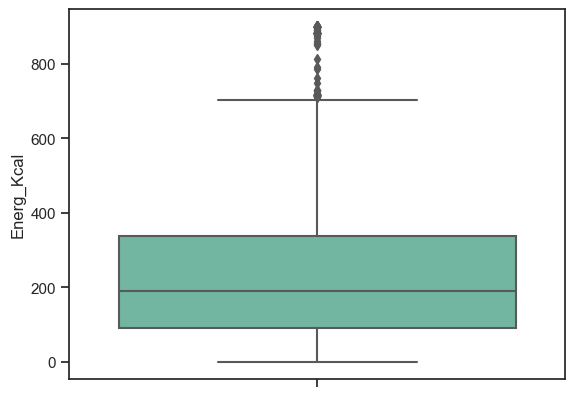

Protein_(g)


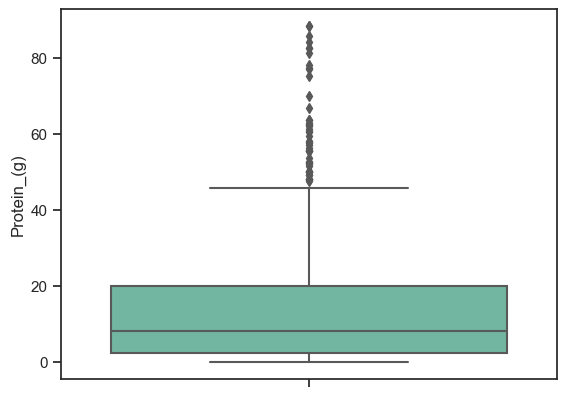

Lipid_Tot_(g)


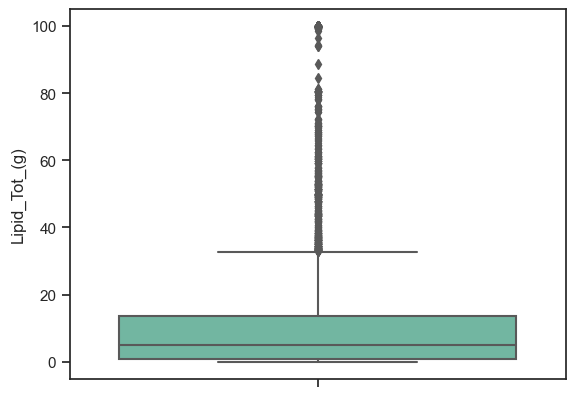

Carbohydrt_(g)


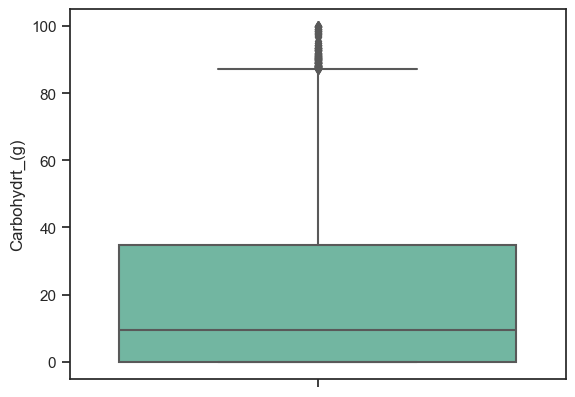

Fiber_TD_(g)


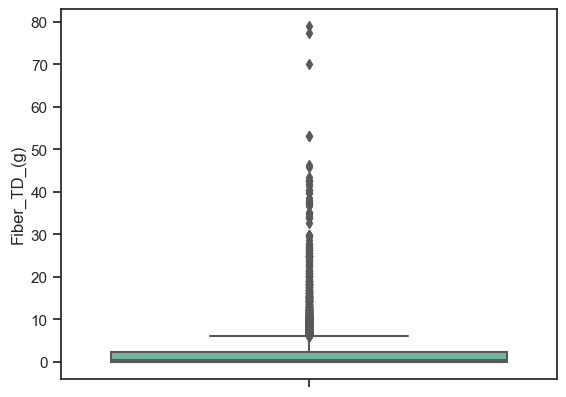

Calcium_(mg)


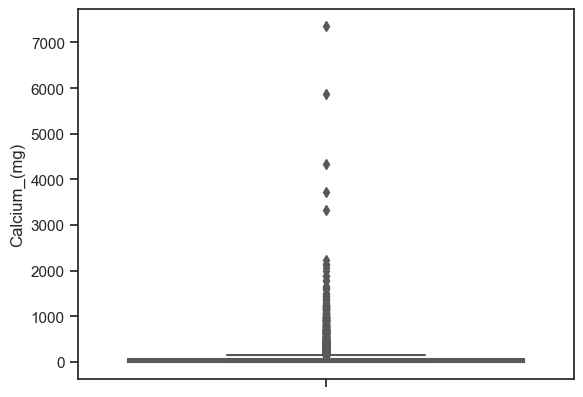

Iron_(mg)


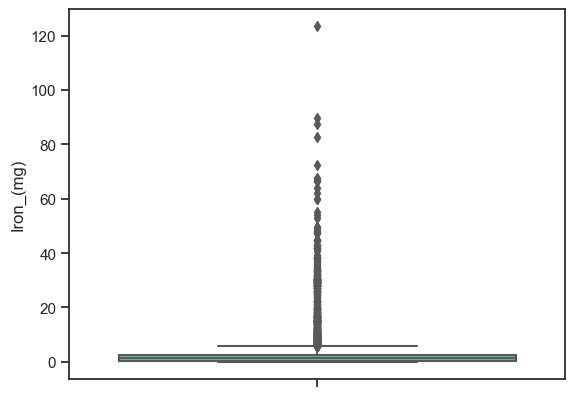

Sodium_(mg)


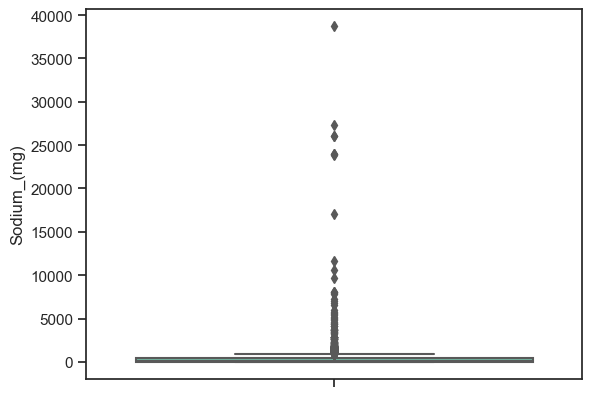

Water_(g)


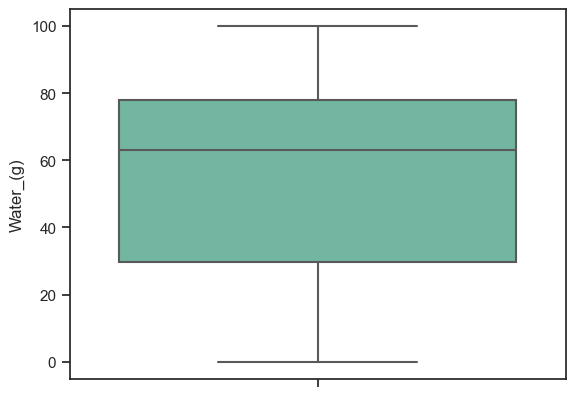

Magnesium_(mg)


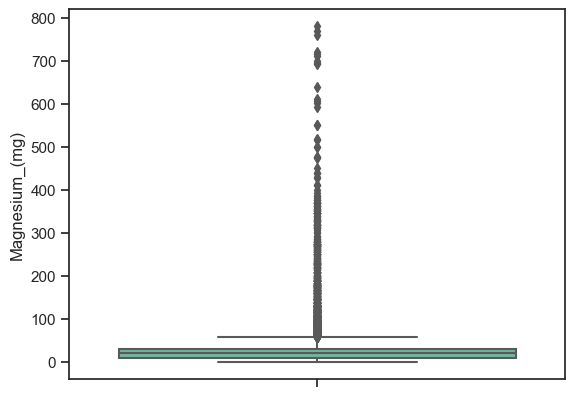

Phosphorus_(mg)


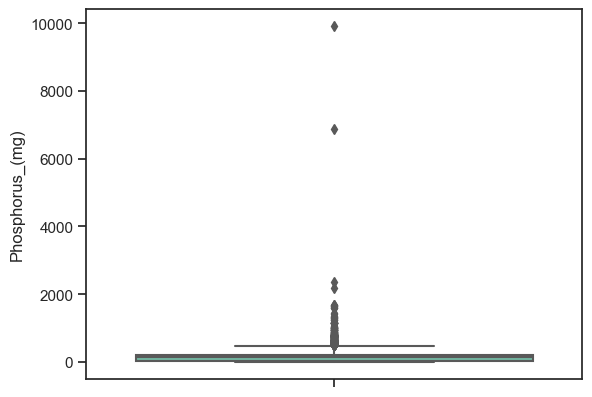

Vit_C_(mg)


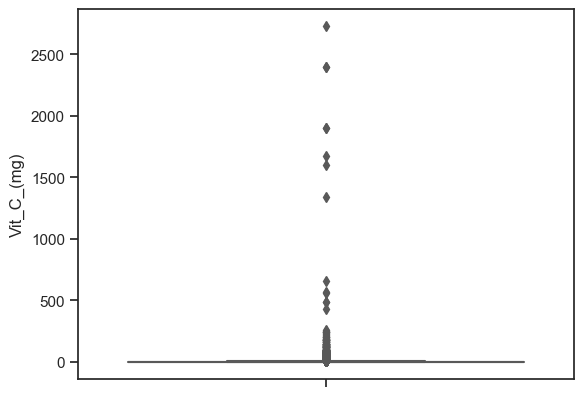

FA_Sat_(g)


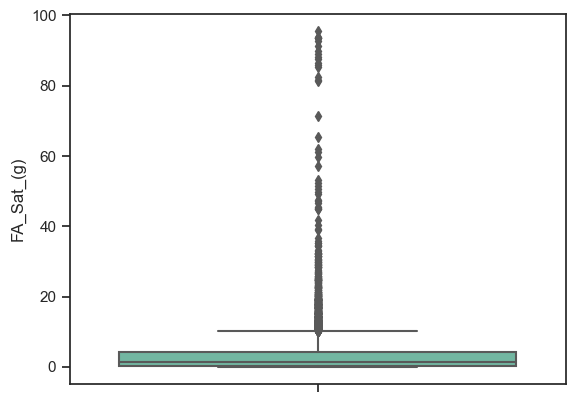

FA_Mono_(g)


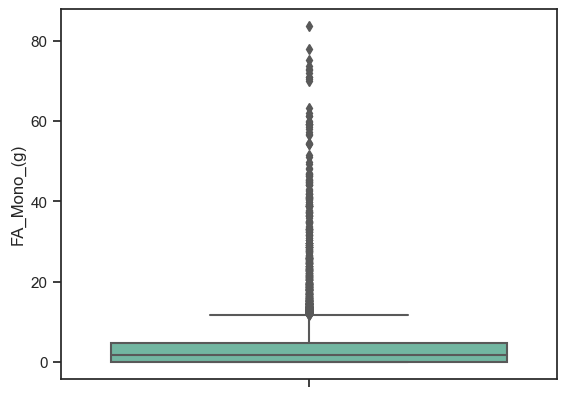

FA_Poly_(g)


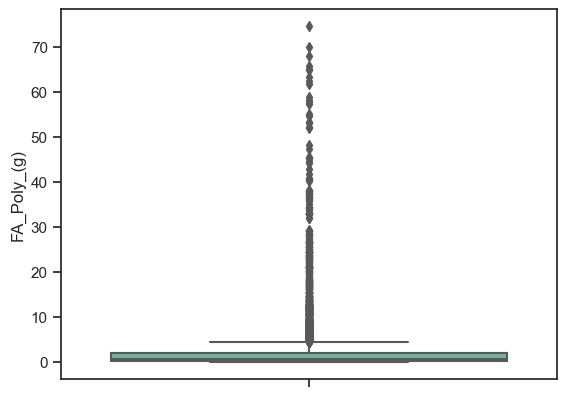

In [16]:
# Analyse descriptive des variables quantitatives

# Sélection des variables quantitatives
quant_vars = df_miss.select_dtypes(include=['float64', 'int64'])

# Tracé des boxplots pour chaque variable quantitative avec Seaborn
sns.set(style="ticks")
for var in quant_vars:
    print(var)
    sns.boxplot(y=var, data=quant_vars, palette="Set2")
    plt.show()


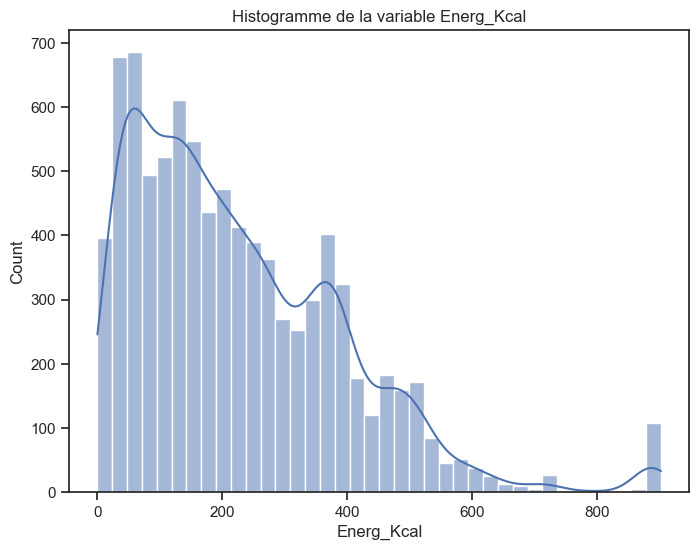

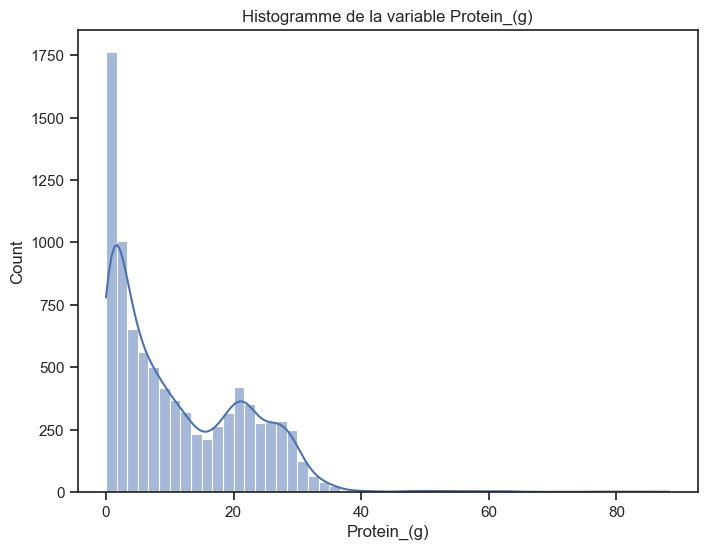

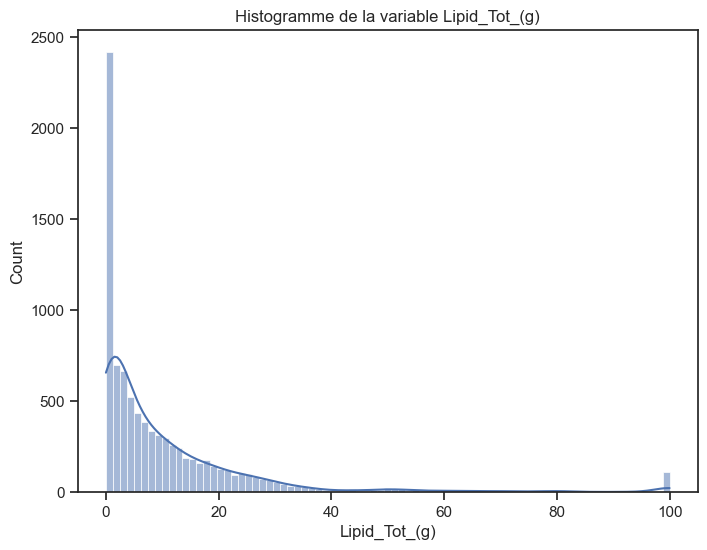

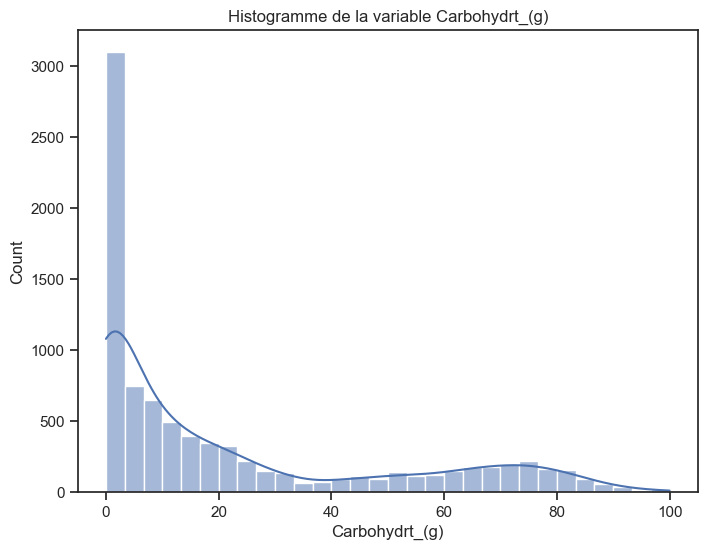

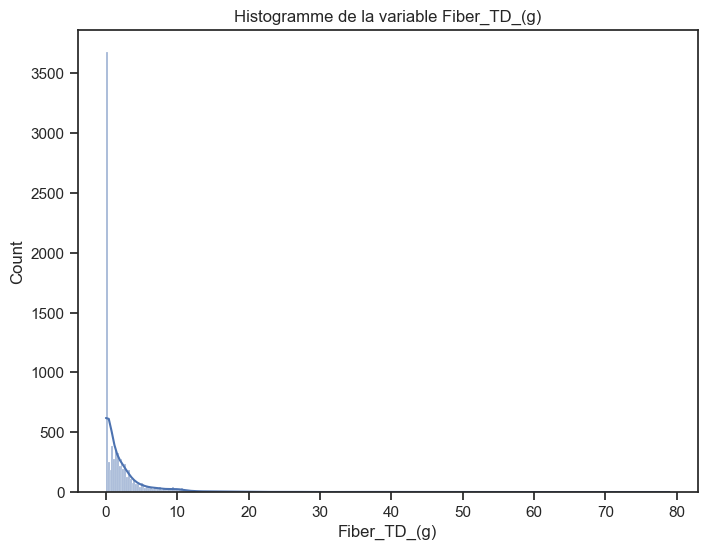

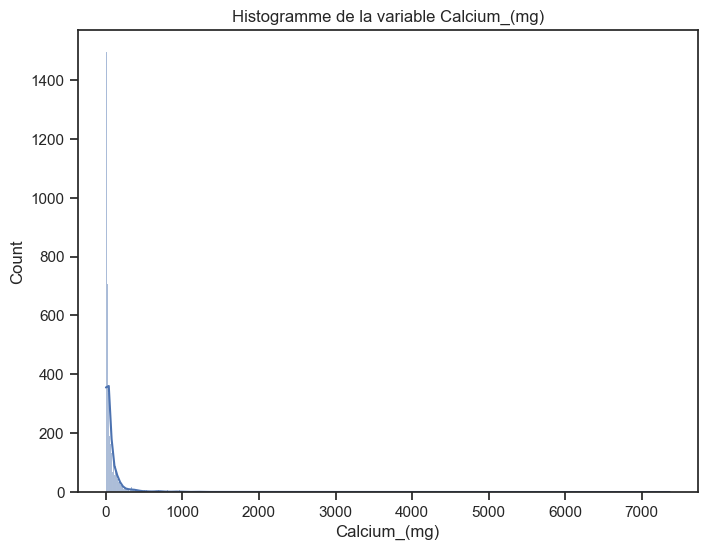

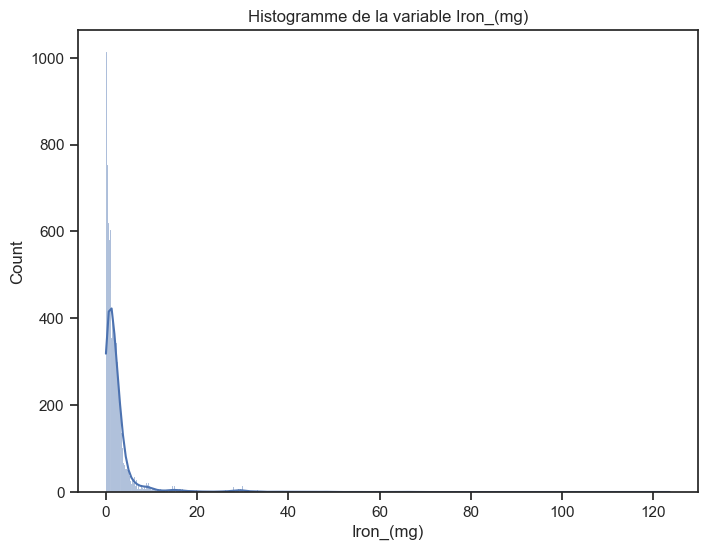

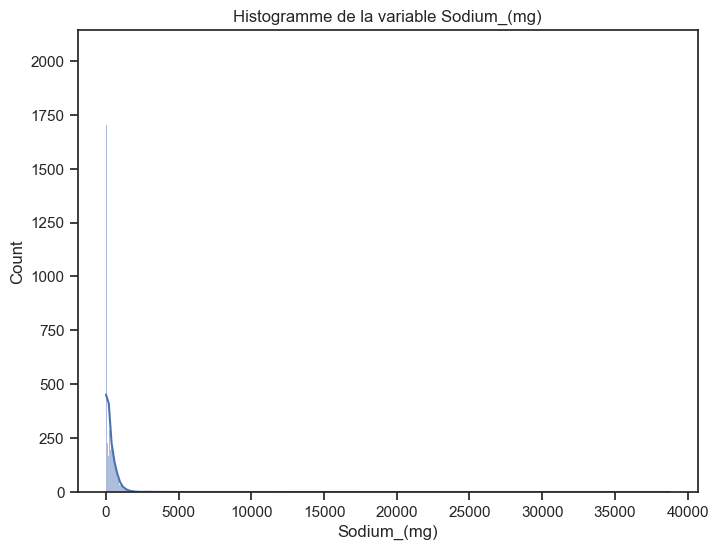

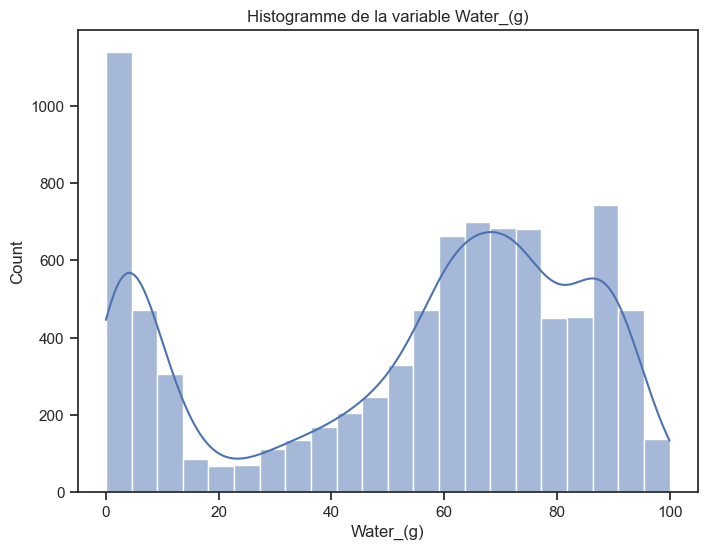

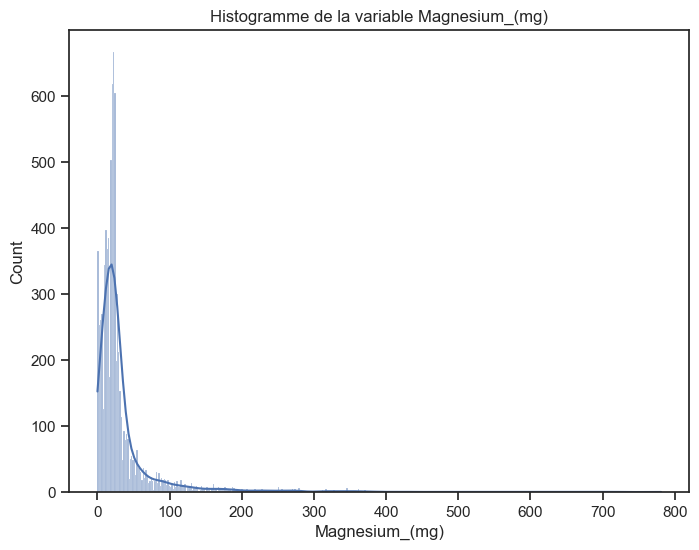

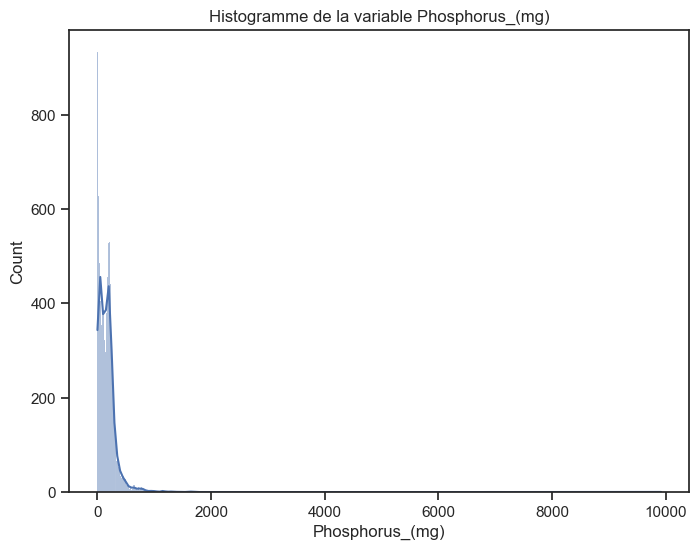

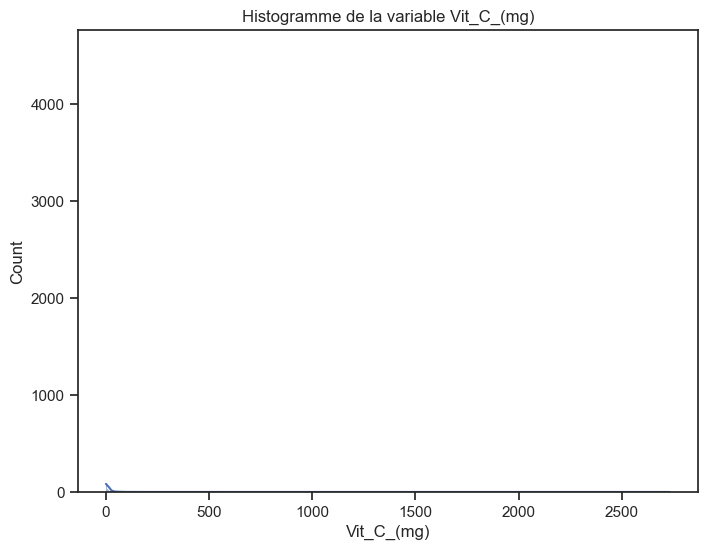

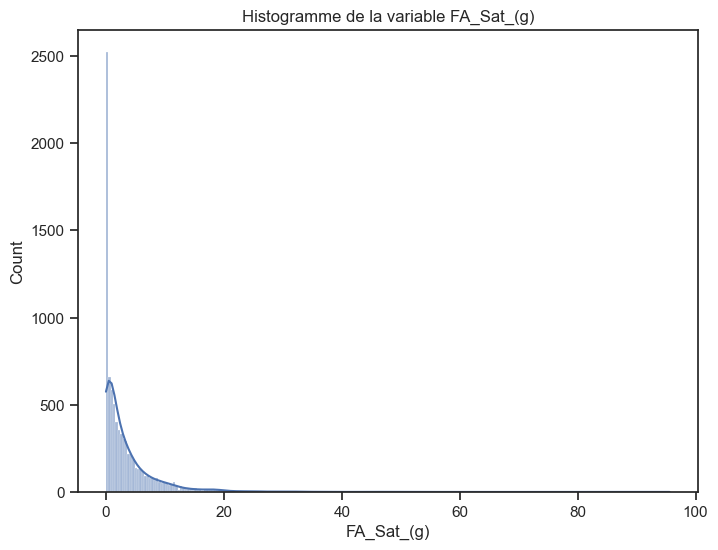

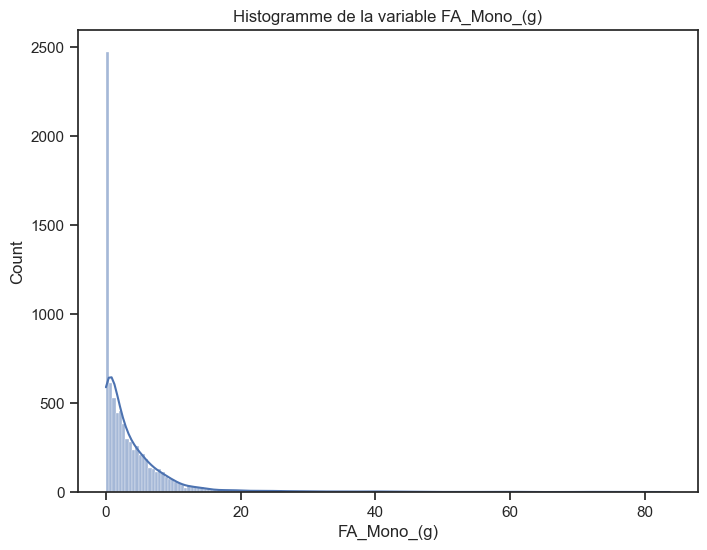

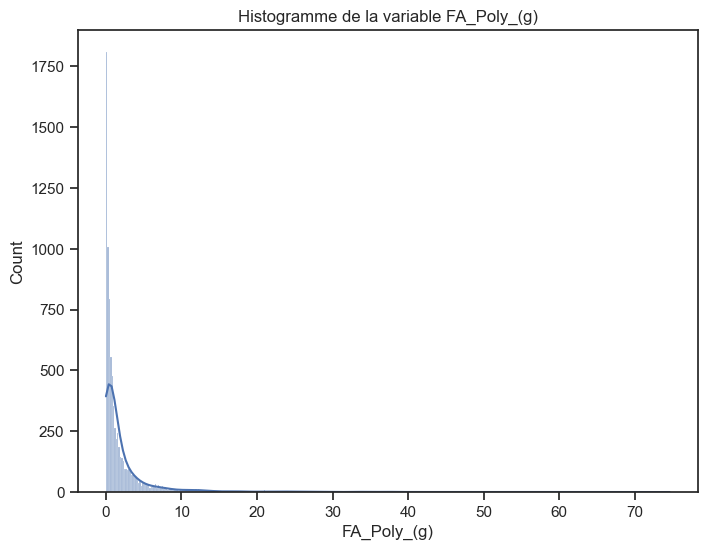

In [17]:
# Analyse de la normalité
from scipy.stats import shapiro

# Création d'un histogramme et d'un test de normalité pour chaque variable
for column in quant_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()



In [18]:

# Initialisation du DataFrame pour les résultats des tests de normalité
normality_df = pd.DataFrame(columns=['Variable', 'P-value', 'Normality'])

# Boucle pour calculer les tests de normalité pour chaque variable
for var in quant_vars:
    stat, p = shapiro(quant_vars[var])
    normality = 'Normal' if p > 0.05 else 'Not Normal'
    normality_df = normality_df.append({'Variable': var, 'P-value': p, 'Normality': normality}, ignore_index=True)

# Affichage du DataFrame des résultats des tests de normalité
print(normality_df)


           Variable  P-value   Normality
0        Energ_Kcal      0.0  Not Normal
1       Protein_(g)      0.0  Not Normal
2     Lipid_Tot_(g)      0.0  Not Normal
3    Carbohydrt_(g)      0.0  Not Normal
4      Fiber_TD_(g)      0.0  Not Normal
5      Calcium_(mg)      0.0  Not Normal
6         Iron_(mg)      0.0  Not Normal
7       Sodium_(mg)      0.0  Not Normal
8         Water_(g)      0.0  Not Normal
9    Magnesium_(mg)      0.0  Not Normal
10  Phosphorus_(mg)      0.0  Not Normal
11       Vit_C_(mg)      0.0  Not Normal
12       FA_Sat_(g)      0.0  Not Normal
13      FA_Mono_(g)      0.0  Not Normal
14      FA_Poly_(g)      0.0  Not Normal


/Users/natachanjongwayepnga/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/var/folders/37/trhmrbz96fxbg7shtyrl360r0000gn/T/ipykernel_942/827266412.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normality_df = normality_df.append({'Variable': var, 'P-value': p, 'Normality': normality}, ignore_index=True)
/Users/natachanjongwayepnga/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/var/folders/37/trhmrbz96fxbg7shtyrl360r0000gn/T/ipykernel_942/827266412.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normality_df = normality_

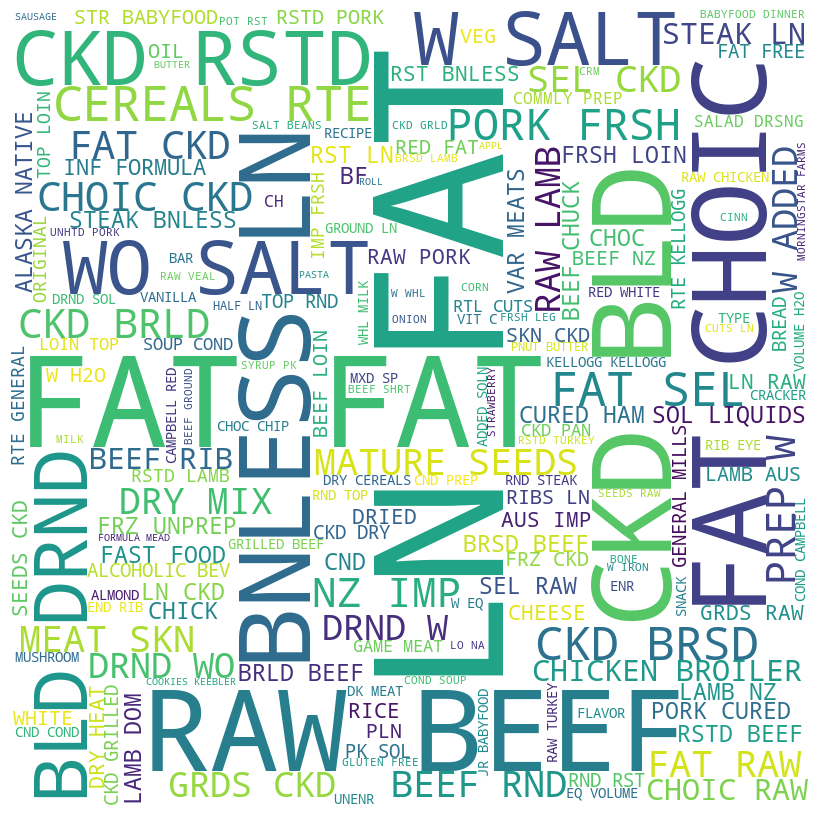

In [19]:
## Analyse de la description des produits
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concaténer toutes les chaînes de caractères dans la variable Shrt_Desc en une seule chaîne
text = ' '.join(df_miss['Shrt_Desc'])

# Générer le word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

# Afficher le word cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Analyse bivariées

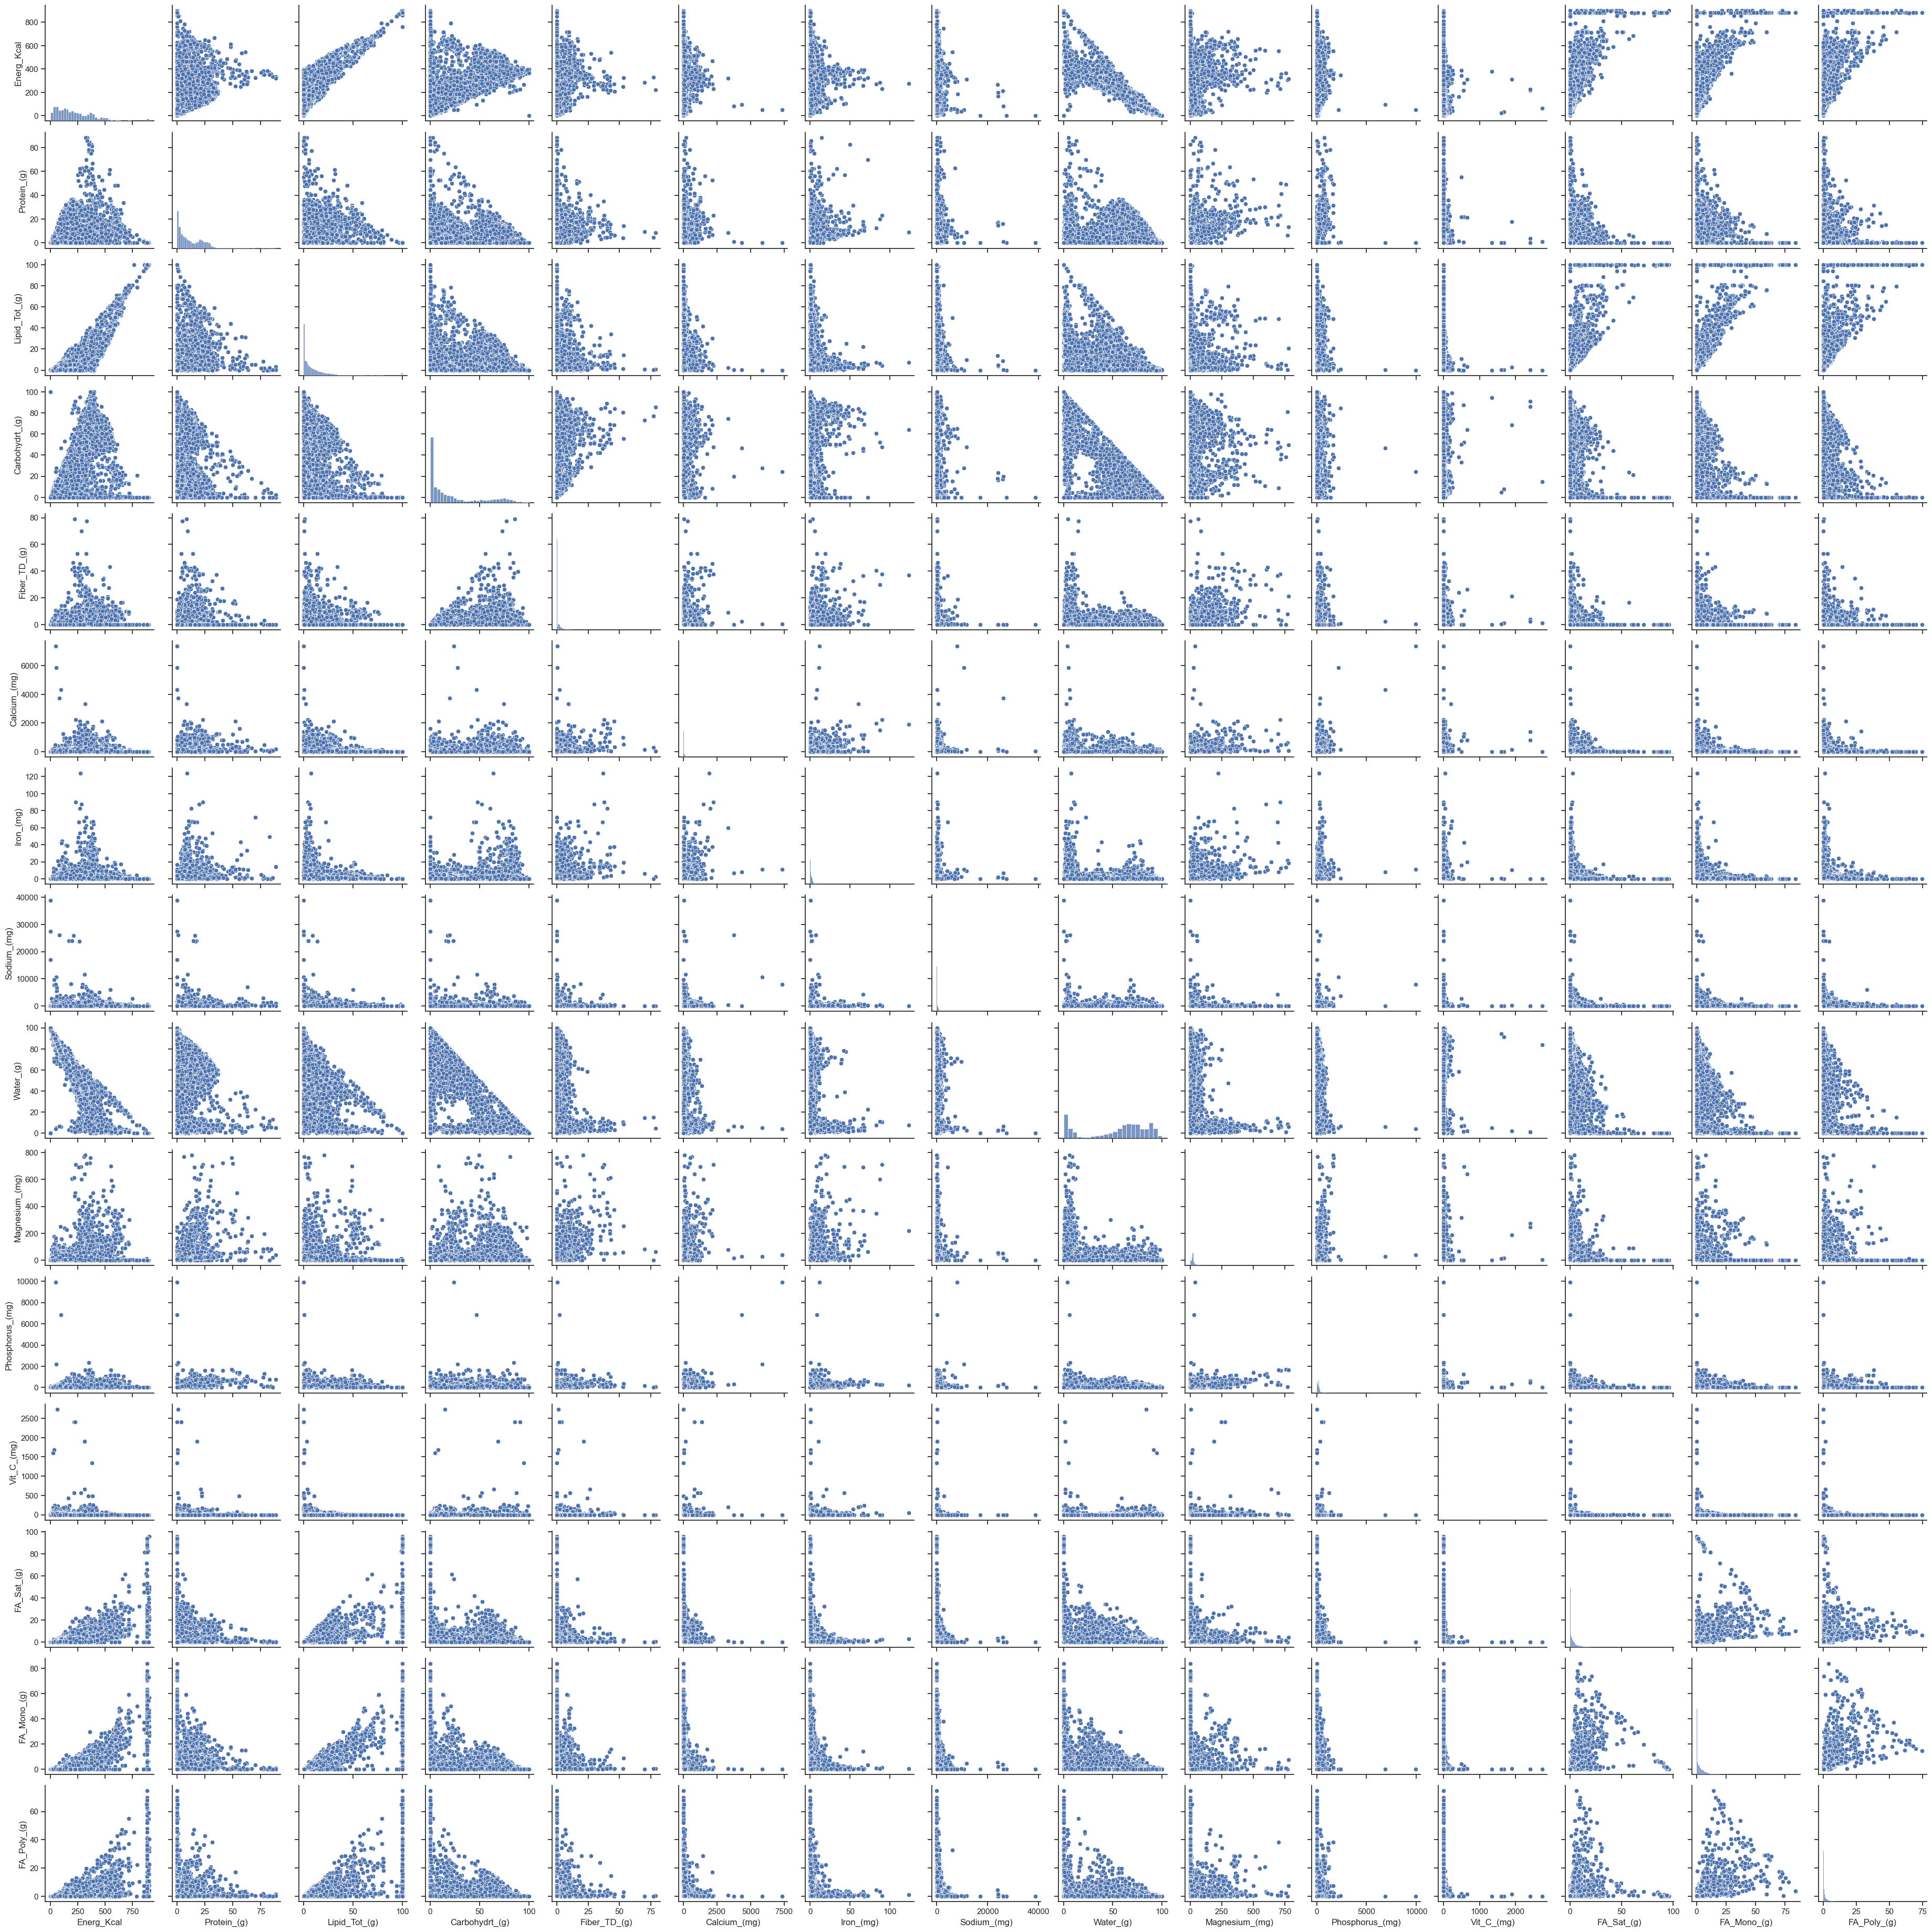

In [20]:
# Relation entre les variables quantitatives

sns.pairplot(df_miss)

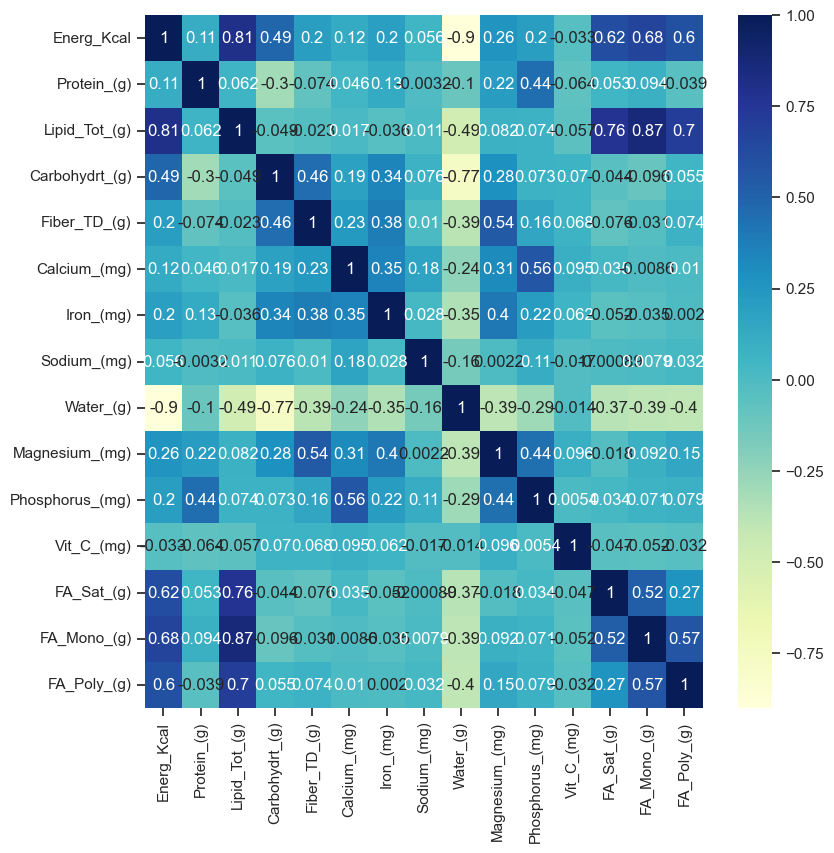

In [21]:
# Obtenir le tableau de corélation et la heatmap (corrélation de pearson)

corr_matrix = df_miss.corr()

# Calcul des p-values pour chaque paire de variables
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")
plt.show()


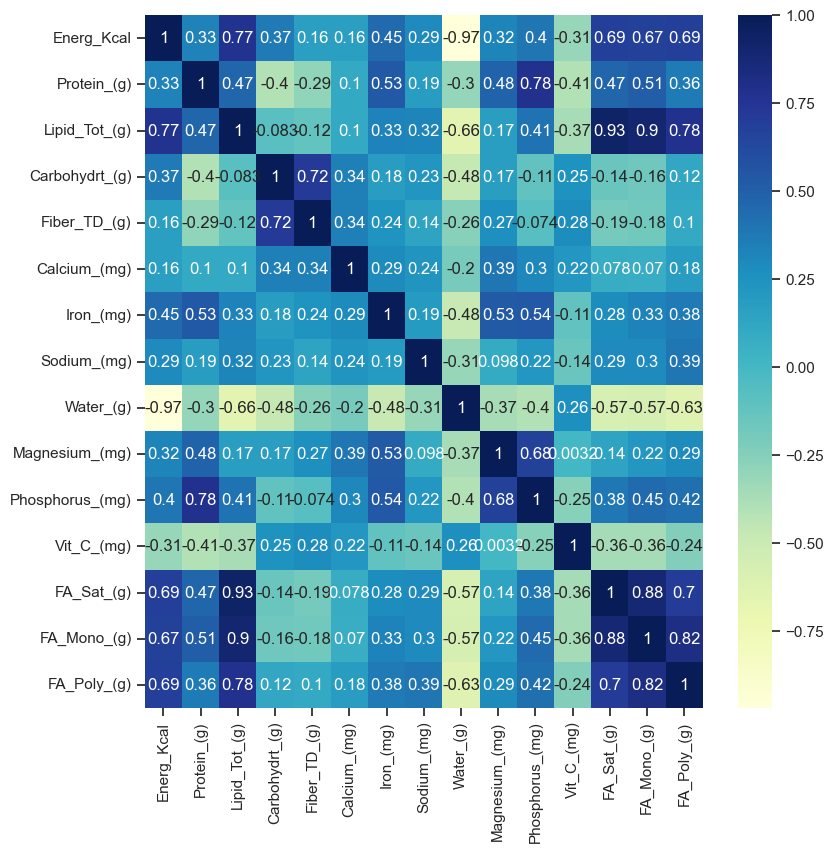

In [22]:
# Obtenir le tableau de corélation et la heatmap (corrélation de spearman)

corr_matrix = df_miss.corr(method='spearman')

# Calcul des p-values pour chaque paire de variables
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")
plt.show()


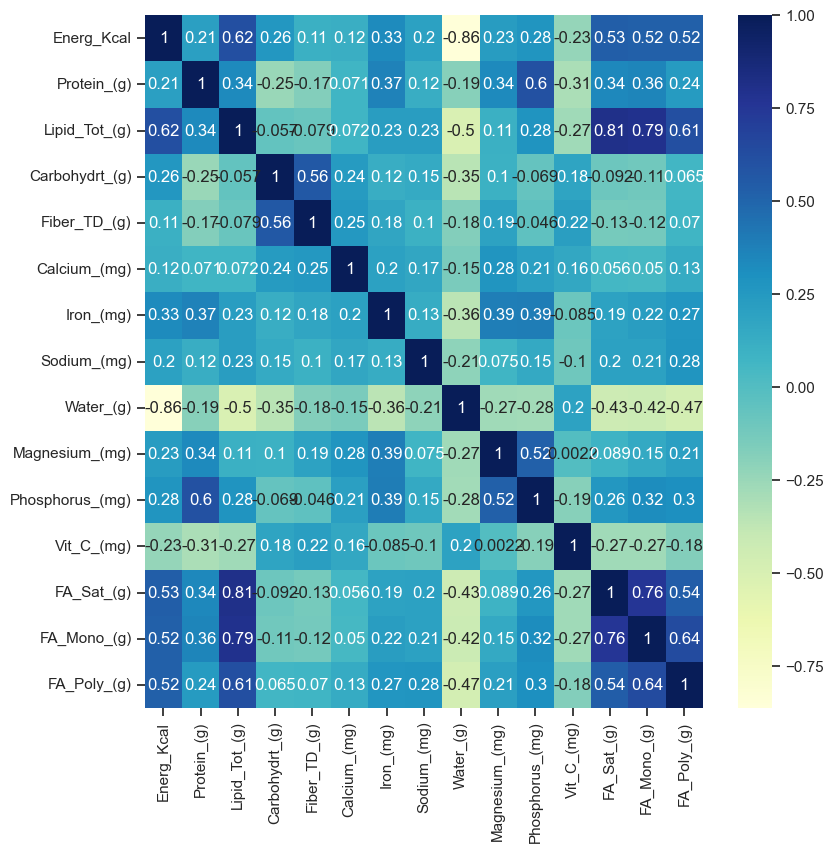

In [23]:
# Obtenir le tableau de corélation et la heatmap (corrélation de kendall)

corr_matrix = df_miss.corr(method='kendall')

# Calcul des p-values pour chaque paire de variables
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")
plt.show()


## Construction de l'ACP

In [24]:

df=df_miss


In [25]:
## Séparation des données en variables quantitative (X) et variable qualitative (Y)
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values


In [26]:
X

array([[7.1700e+02, 8.5000e-01, 8.1110e+01, ..., 5.1368e+01, 2.1021e+01,
        3.0430e+00],
       [7.1800e+02, 4.9000e-01, 7.8300e+01, ..., 4.5390e+01, 1.9874e+01,
        3.3310e+00],
       [8.7600e+02, 2.8000e-01, 9.9480e+01, ..., 6.1924e+01, 2.8732e+01,
        3.6940e+00],
       ...,
       [2.6900e+02, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [9.0000e+01, 1.6100e+01, 1.4000e+00, ..., 3.6100e-01, 2.5900e-01,
        2.5200e-01],
       [8.9000e+01, 1.9800e+01, 5.0000e-01, ..., 1.2700e-01, 8.8000e-02,
        1.7000e-01]])

In [27]:
# Standardisation des données
# Normaliser les données
from sklearn.preprocessing import StandardScaler

# Créer un objet scaler de la classe StandardScaler
scaler = StandardScaler()

# Utiliser la méthode fit_transform() sur l'objet scaler pour normaliser les données
X_scaled = scaler.fit_transform(X)



In [28]:
# Réduction de dimension
from sklearn.decomposition import PCA

pca = PCA()
X_pca=pca.fit_transform(X_scaled)


In [29]:
p=len(vars_list)
p

15

## Aide à l'interprétation

### Choix du nombre d'axe

In [30]:
# Analyse des valeurs propres
p=len(vars_list)
comp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(p)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
comp

Dimension  Valeur propre  % variance expliquée  % cum. var. expliquée
0       Dim1       4.405104                  29.0                   29.0
1       Dim2       2.803363                  19.0                   48.0
2       Dim3       1.707862                  11.0                   59.0
3       Dim4       1.107273                   7.0                   67.0
4       Dim5       1.014667                   7.0                   74.0
5       Dim6       0.846930                   6.0                   79.0
6       Dim7       0.795014                   5.0                   85.0
7       Dim8       0.688128                   5.0                   89.0
8       Dim9       0.628821                   4.0                   93.0
9      Dim10       0.372836                   2.0                   96.0
10     Dim11       0.333494                   2.0                   98.0
11     Dim12       0.258182                   2.0                  100.0
12     Dim13       0.034260                   0.0                  100.0
13     Dim14       0.003703                   0.0                  100.0
14     Dim15       0.002070                   0.0                  100.0

Text(3.25, 26, '25%')

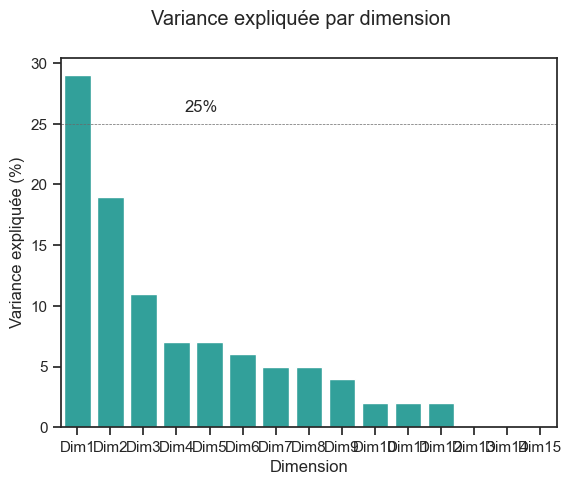

In [31]:
# Scree plot pour choisir le nombre de composantes principales
g_comp = sns.barplot(x = "Dimension", 
                y = "% variance expliquée",
                palette = ["lightseagreen"],
                data = comp)
g_comp.set(ylabel = "Variance expliquée (%)")
g_comp.figure.suptitle("Variance expliquée par dimension")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
plt.text(3.25, 26, "25%")


### Autres aide à l'interprétation

##### Qualité de représentation des variables et contribution à la formation des axes

Lors de l'analyse en composantes principales (ACP), il est important de mesurer la qualité de représentation des variables sur les axes principaux et leur contribution à la formation de ces axes.

**Qualité de représentation des variables (cosinus carré)**

La qualité de représentation des variables est souvent mesurée à l'aide du carré du cosinus de l'angle entre les vecteurs représentant les variables et les axes principaux. Le cosinus carré est également appelé **cos2**. Pour une variable donnée, la somme des cos2 sur tous les axes principaux est égale à 1.

La formule pour calculer le cos2 pour une variable `i` sur un axe principal `k` est la suivante :

$$
\text{cos}^2(i, k) = \frac{\text{coord}(i, k)^2}{\lVert\text{coord}(i)\rVert^2}
$$


ooù $\text{coord}(i, k)$ est la coordonnée de la variable `i` sur l'axe principal `k`.


**Un seuil couramment utilisé pour interpréter la qualité de représentation des variables est 0,5**. Si le cos2 d'une variable est supérieur à 0,5 sur un axe principal, cela signifie que cet axe représente bien la variable.

**Contribution des variables à la formation des axes (CTR)**

La contribution des variables à la formation des axes indique l'importance relative de chaque variable pour expliquer la variabilité des données sur un axe principal donné. Cette contribution est souvent exprimée en pourcentage et est calculée à l'aide de la formule suivante :

$$
\text{CTR}(i, k) = \frac{\text{coord}(i, k)^2}{n \cdot \lambda_k}
$$


où :
- $\text{coord}(i, k)$ est la coordonnée de la variable `i` sur l'axe principal `k`
- $n$ est le nombre total de variables
- $\lambda_k$ est la valeur propre associée à l'axe principal `k`


Il est important de noter que la somme des contributions des variables sur un axe principal donné est égale à 100 %.

En interprétant les contributions des variable  à la formation des axes, **il est courant de considérer les variables ayant une contribution supérieure à la contribution moyenne (100 % / nombre de variables)** comme étant importantes pour la formation de l'axe principal considéré.

In [32]:
# Calcul du cosinus carré des variables
cos_squared = np.square(pca.components_)

# Création d'un dataframe pandas avec le cosinus carré des variables
df_cos_squared = pd.DataFrame(cos_squared, columns=['PC{}'.format(i+1) for i in range(X.shape[1])])
df_cos_squared.index = df_miss.columns[1:]

print(df_cos_squared)

                      PC1       PC2       PC3       PC4       PC5       PC6  \
Energ_Kcal       0.206126  0.004336  0.147326  0.042977  0.026473  0.019409   
Protein_(g)      0.006358  0.001295  0.109536  0.105154  0.129334  0.094299   
Lipid_Tot_(g)    0.010790  0.345235  0.002410  0.217305  0.033364  0.066420   
Carbohydrt_(g)   0.000298  0.033107  0.000802  0.012776  0.060937  0.098192   
Fiber_TD_(g)     0.006766  0.055486  0.008253  0.018757  0.000912  0.071693   
Calcium_(mg)     0.036521  0.090782  0.005825  0.060446  0.115581  0.004492   
Iron_(mg)        0.003800  0.192562  0.005529  0.000394  0.000964  0.333863   
Sodium_(mg)      0.007429  0.000595  0.010364  0.072228  0.026313  0.001582   
Water_(g)        0.002239  0.003078  0.001477  0.005394  0.212795  0.005292   
Magnesium_(mg)   0.000584  0.083650  0.000078  0.004900  0.380944  0.021431   
Phosphorus_(mg)  0.000585  0.002450  0.000141  0.004531  0.000766  0.008679   
Vit_C_(mg)       0.005120  0.115147  0.000932  0.000

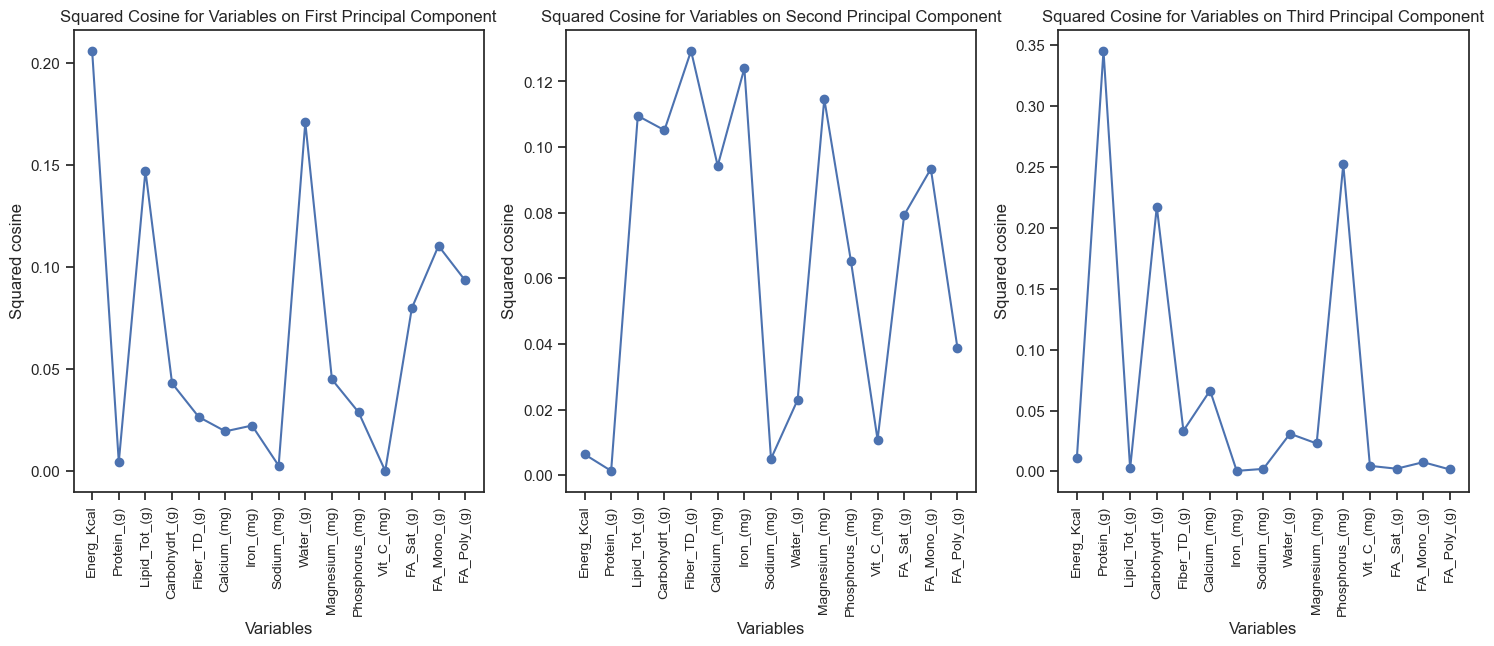

In [33]:
# Calculer les carrés des cosinus des variables sur les axes principaux
cos2 = pca.components_ ** 2
row_sums = cos2.sum(axis=1)
cos2 = cos2 / row_sums[:, np.newaxis]

# Afficher les graphiques des carrés des cosinus des variables sur les axes principaux pour le premier, le deuxième et le troisième axe principal
n_comp = pca.n_components_
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].plot(range(1, len(vars_list)+1), cos2[0,:], '-o')
axs[0].set_xticks(range(1, len(vars_list)+1))
axs[0].set_xticklabels(vars_list, rotation=90, fontsize=10)
axs[0].set_xlabel("Variables")
axs[0].set_ylabel("Squared cosine")
axs[0].set_title("Squared Cosine for Variables on First Principal Component")
axs[1].plot(range(1, len(vars_list)+1), cos2[1,:], '-o')
axs[1].set_xticks(range(1, len(vars_list)+1))
axs[1].set_xticklabels(vars_list, rotation=90, fontsize=10)
axs[1].set_xlabel("Variables")
axs[1].set_ylabel("Squared cosine")
axs[1].set_title("Squared Cosine for Variables on Second Principal Component")
axs[2].plot(range(1, len(vars_list)+1), cos2[2,:], '-o')
axs[2].set_xticks(range(1, len(vars_list)+1))
axs[2].set_xticklabels(vars_list, rotation=90, fontsize=10)
axs[2].set_xlabel("Variables")
axs[2].set_ylabel("Squared cosine")
axs[2].set_title("Squared Cosine for Variables on Third Principal Component")
plt.show()

In [34]:
df.index

Int64Index([ 1001,  1002,  1003,  1004,  1005,  1006,  1007,  1008,  1009,
             1010,
            ...
            44258, 44259, 44260, 48052, 80200, 83110, 90240, 90480, 90560,
            93600],
           dtype='int64', name='NDB_No', length=8790)

In [35]:
# Contribution à la formation de l'axe
# Obtenir les composantes principales
components = pca.components_

n_components = X.shape[1]
feature_names=df.columns[1:]
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues


# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contributions, columns=column_names, index=feature_names)

print(variable_contrib_df)

                 PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib  \
Energ_Kcal          0.908005     0.017823     0.018428     0.000330   
Protein_(g)         0.019103     0.003629     0.589614     0.036659   
Lipid_Tot_(g)       0.648985     0.307069     0.004117     0.000888   
Carbohydrt_(g)      0.189316     0.294784     0.371126     0.014146   
Fiber_TD_(g)        0.116616     0.362570     0.056981     0.067474   
Calcium_(mg)        0.085498     0.264353     0.113436     0.108725   
Iron_(mg)           0.098032     0.347702     0.000761     0.019242   
Sodium_(mg)         0.011296     0.013952     0.003559     0.700905   
Water_(g)           0.753380     0.064343     0.052859     0.009468   
Magnesium_(mg)      0.197758     0.321460     0.039170     0.104781   
Phosphorus_(mg)     0.126750     0.182954     0.430501     0.015337   
Vit_C_(mg)          0.000022     0.030293     0.007807     0.015903   
FA_Sat_(g)          0.352057     0.222315     0.003798     0.003726   
FA_Mon

In [36]:
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

# Convertir les contributions en pourcentage
variable_contrib_percent = variable_contributions / eigenvalues * 100

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contrib_percent, columns=column_names, index=feature_names)

print(variable_contrib_df)

                 PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib  \
Energ_Kcal         20.612576     0.635759     1.079037     0.029820   
Protein_(g)         0.433645     0.129461    34.523508     3.310723   
Lipid_Tot_(g)      14.732564    10.953589     0.241045     0.080164   
Carbohydrt_(g)      4.297661    10.515362    21.730463     1.277575   
Fiber_TD_(g)        2.647285    12.933380     3.336370     6.093707   
Calcium_(mg)        1.940889     9.429859     6.641997     9.819177   
Iron_(mg)           2.225412    12.403027     0.044533     1.737821   
Sodium_(mg)         0.256430     0.497686     0.208401    63.300077   
Water_(g)          17.102424     2.295204     3.095067     0.855098   
Magnesium_(mg)      4.489299    11.466960     2.293526     9.462958   
Phosphorus_(mg)     2.877339     6.526246    25.206995     1.385096   
Vit_C_(mg)          0.000489     1.080584     0.457135     1.436201   
FA_Sat_(g)          7.992036     7.930300     0.222378     0.336477   
FA_Mon

#### Qualité de représentation des individus et contribution à la formation des axes

Lors de l'analyse en composantes principales (ACP), il est important de mesurer la qualité de représentation des individus sur les axes principaux et leur contribution à la formation de ces axes.

**Qualité de représentation des individus (cosinus carré)**

La qualité de représentation des individus est souvent mesurée à l'aide du carré du cosinus de l'angle entre les vecteurs représentant les individus et les axes principaux. Le cosinus carré est également appelé **cos²**. Pour un individu donné, la somme des cos² sur tous les axes principaux est égale à 1.

La formule pour calculer le cos² pour un individu `i` sur un axe principal `k` est la suivante :

$$
\text{cos}^2(i, k) = \frac{\text{coord}(i, k)^2}{\lVert\text{coord}(i)\rVert^2}
$$

où $\text{coord}(i, k)$ est la coordonnée de l'individu `i` sur l'axe principal `k`.

Un seuil couramment utilisé pour interpréter la qualité de représentation des individus est 0,5. Si le cos² d'un individu est supérieur à 0,5 sur un axe principal, cela signifie que cet axe représente bien l'individu.

**Contribution des individus à la formation des axes (CTR)**

La contribution des individus à la formation des axes indique l'importance relative de chaque individu pour expliquer la variabilité des données sur un axe principal donné. Cette contribution est souvent exprimée en pourcentage et est calculée à l'aide de la formule suivante :

$$
\text{CTR}(i, k) = \frac{\text{coord}(i, k)^2}{n \cdot \lambda_k}
$$

où :
- $\text{coord}(i, k)$ est la coordonnée de l'individu `i` sur l'axe principal `k`
- $n$ est le nombre total d'individus
- $\lambda_k$ est la valeur propre associée à l'axe principal `k`

Il est important de noter que la somme des contributions des individus sur un axe principal donné est égale à 100 %.

En interprétant les contributions des individus à la formation des axes, **il est courant de considérer les individus ayant une contribution supérieure à la contribution moyenne (100 % / nombre d'individus) comme étant importants pour la formation de l'axe principal considéré**.

In [37]:
# Calculer la contribution des individus à la formation des axes
eigenvalues = pca.explained_variance_
contributions = (X_pca**2) / (X_pca.shape[0] * eigenvalues)

# Convertir les contributions en pourcentage
contrib_percent = contributions * 100

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
contrib_df = pd.DataFrame(contrib_percent, columns=column_names)

print(contrib_df)

      PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib  PC5_contrib  \
0        0.090542     0.121664     0.000645     0.007634     0.008316   
1        0.079689     0.105436     0.001357     0.006400     0.006702   
2        0.157242     0.188321     0.001150     0.001150     0.011186   
3        0.010511     0.002060     0.033759     0.028549     0.004046   
4        0.013599     0.000967     0.047268     0.019995     0.006338   
...           ...          ...          ...          ...          ...   
8785     0.005950     0.002112     0.012490     0.111850     0.000115   
8786     0.003582     0.000577     0.016787     0.000795     0.000900   
8787     0.000132     0.002283     0.032125     0.001561     0.003472   
8788     0.001102     0.009066     0.018003     0.023973     0.000053   
8789     0.006734     0.000010     0.008866     0.000279     0.000116   

      PC6_contrib  PC7_contrib  PC8_contrib  PC9_contrib  PC10_contrib  \
0        0.071918     0.060913     0.105065     0

# Représentation graphique et interprétation

In [38]:
#fonction qui permet de tracer le graphes de corrélations selon les plans choisis
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i], fontsize=12, weight='bold',color='b')
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # Titre du graphe
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.savefig('CorrGraph_{}.jpg'.format(x_y), bbox_inches='tight')
    plt.show(block=False)

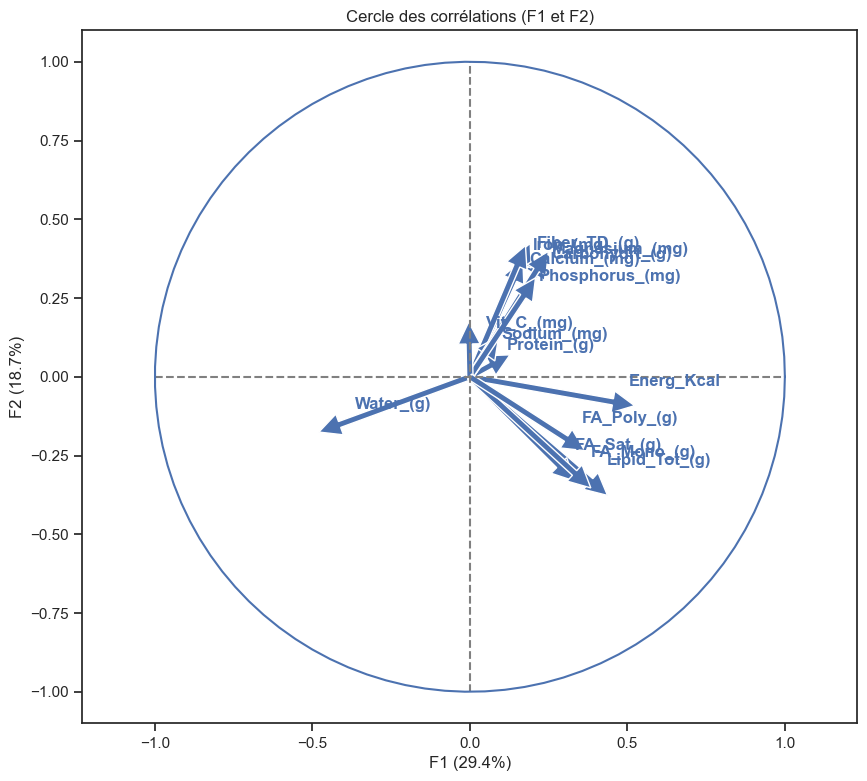

In [39]:
#pour F1 et F2
x_y = (0,1)
x_y
correlation_graph(pca, x_y, vars_list)

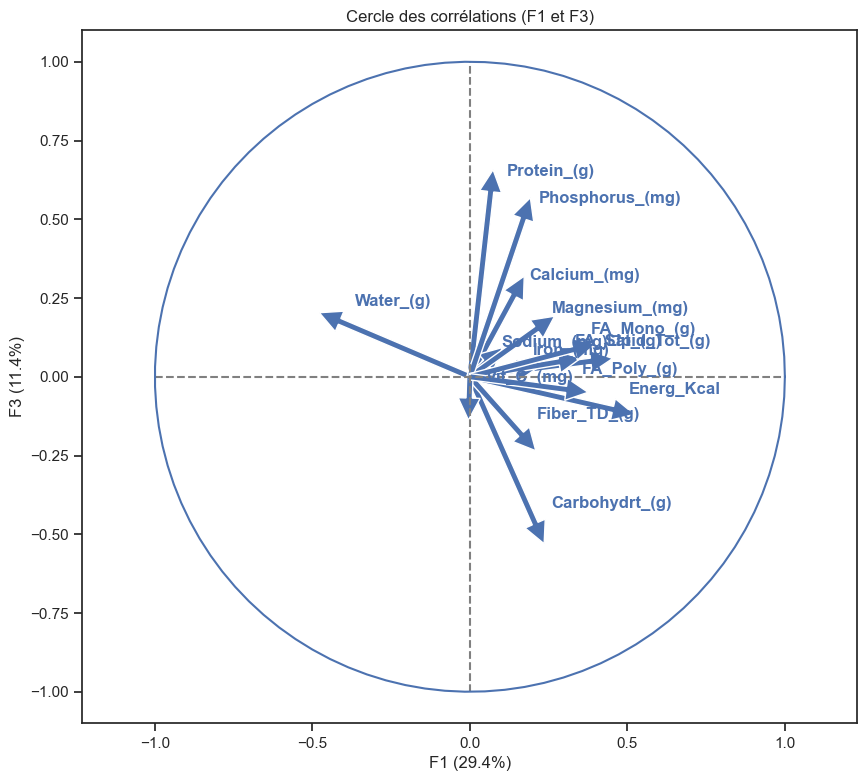

In [40]:
#pour F2 et F3
x_y = (0,2)
x_y
correlation_graph(pca, x_y, vars_list)

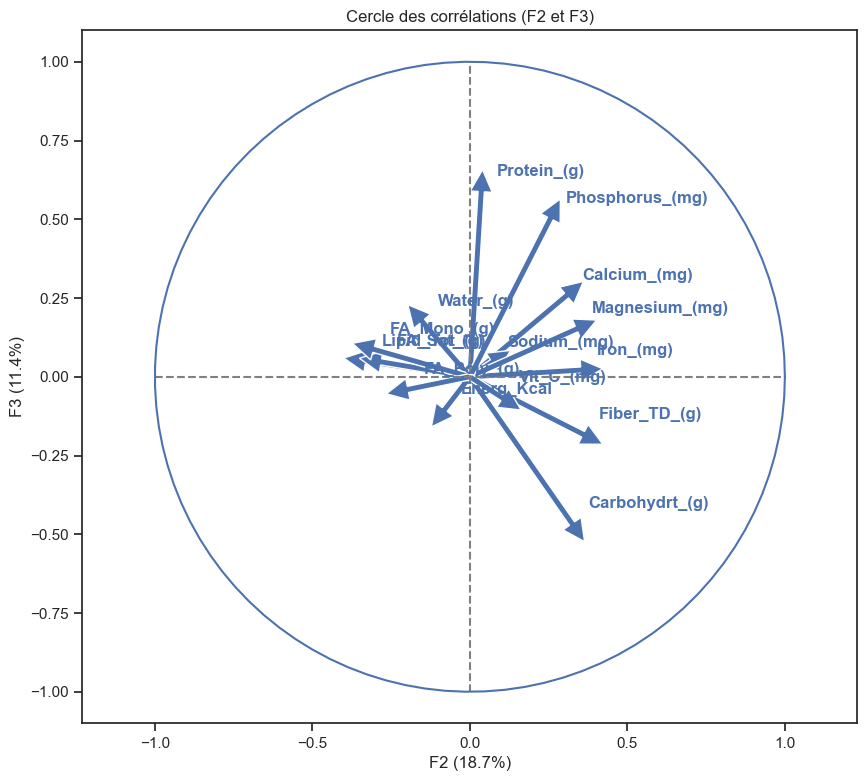

In [41]:
#pour F2 et F2
x_y = (1,2)
x_y
correlation_graph(pca, x_y, vars_list)

NameError: name 'WGI_pca_df' is not defined

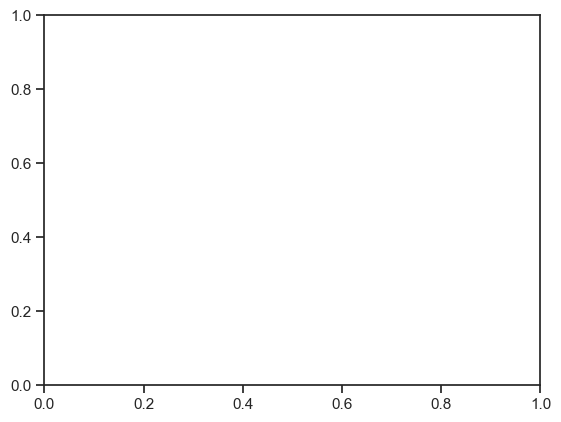

In [42]:
# utilisation de subplots nécessaire car annotation du graphique
fig, ax = plt.subplots()
WGI_pca_df.plot.scatter("Dim1", "Dim2", ax = ax) # l'option ax permet de placer les points et le texte sur le même graphique

# boucle sur chaque pays
for k in WGI_pca_df.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Dim1']) > 3.5) | (abs(k[1]['Dim2']) > 1.5):
        ax.annotate(k[1]["Country"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 9)
plt.xlabel("Dimension 1 (83%)") 
plt.ylabel("Dimension 2 (8 %)")
plt.suptitle("Premier plan factoriel (91%)")
plt.show()